# 💊 COVID-19 pandemic statistics 💊

## I. Content: 
In-depth analysis of the COVID-19 pandemic, providing a comprehensive overview of the global situation.

Link: https://www.stats.govt.nz/large-datasets/csv-files-for-download/

## II. 📊 Useful Insights from COVID-19 Data

1. 🕒 **Time-Based Trends**

-   Line charts showing confirmed cases, deaths, and recoveries over time (daily or monthly).

-   Identify outbreak peaks and major turning points.

2. 🌍 **Country Comparisons**

-   Analyze which countries have highest mortality rates relative to infections.

-   Compare recovery effectiveness across regions or countries.

3. ⚖️ **Mortality and Recovery Rates**

-   Compute:

    -   **Mortality rate** = `Deaths / Confirmed`

    -   **Recovery rate** = `Recovered / Confirmed`

-   Observe trends over time or between countries/regions.

4. 📅 **Segment by Time Periods**

-   Group data by quarter, year, or health policy phases (e.g. lockdowns, vaccination periods).

-   Analyze impact of timing on epidemic control.

5. 📈 **Growth Analysis**

-   Measure case growth over days/weeks.

-   Track percentage change compared to previous period to assess trend direction.

🧾 Giải thích các cột:

| Cột                | Ý nghĩa                                                                                          |
| ------------------ | ------------------------------------------------------------------------------------------------ |
| **Date**           | Ngày ghi nhận dữ liệu (định dạng mm/dd/yyyy)                                                     |
| **Country/Region** | Tên quốc gia hoặc vùng lãnh thổ báo cáo dữ liệu                                                  |
| **Confirmed**      | Tổng số **ca nhiễm COVID-19 được xác nhận** tính đến ngày đó                                     |
| **Deaths**         | Tổng số **ca tử vong do COVID-19** tính đến ngày đó                                              |
| **Recovered**      | Tổng số **ca khỏi bệnh** được báo cáo tính đến ngày đó                                           |
| **`Active`**         | Số **ca đang điều trị** tại thời điểm đó (thường được tính = Confirmed − Deaths − Recovered)     |
| **New cases**      | Số **ca nhiễm mới phát sinh** trong ngày đó                                                      |
| **New deaths**     | Số **ca tử vong mới** trong ngày đó                                                              |
| **New recovered**  | Số **ca mới hồi phục** trong ngày đó                                                             |
| **WHO Region**     | **Khu vực** do Tổ chức Y tế Thế giới (WHO) phân loại (ví dụ: Europe, Africa, Americas, v.v.)     |
| **iso\_alpha**     | Mã quốc gia dạng **ISO Alpha-3** (3 ký tự viết tắt, ví dụ: `VNM` cho Việt Nam, `USA` cho Hoa Kỳ) |



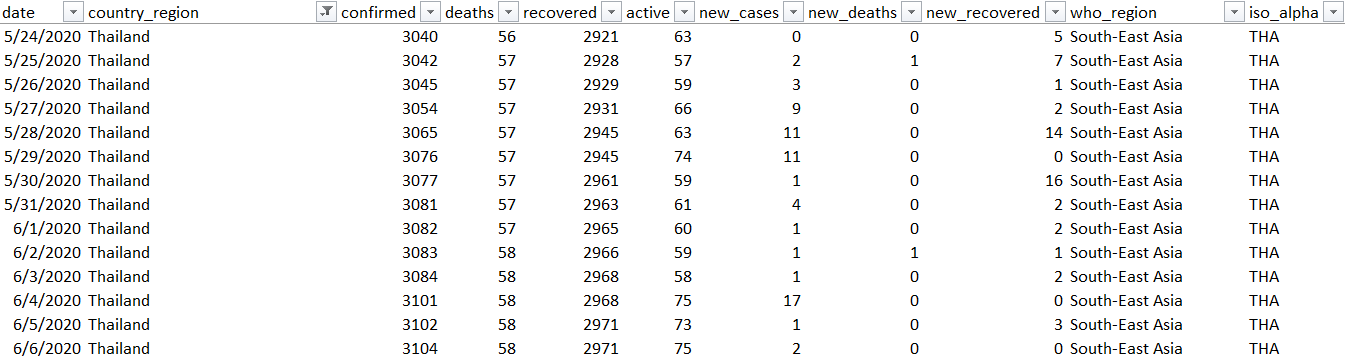

## III. Data cleaning
### 📚 Import libraries

In [279]:
# your code here
# Import necessary libraries
import pandas as pd                # Handle tabular data
import numpy as np                # Handle missing values, NaN, and mathematical operations
import dateparser                 # Parse date/time from natural language strings
from datetime import datetime     # Work with date and time objects
from collections import Counter   # Count errors or anomalies in data
import math                       # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Visualization with advanced plots

In [280]:
# your code here

df = pd.read_csv(r"data_selflearning\covid_grouped.csv")
df.sample(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
4703,2020-02-16,Burundi,0,0,0,0,0,0,0,Africa,BDI
2573,2020-02-04,Saint Vincent and the Grenadines,0,0,0,0,0,0,0,Americas,VCT
20931,2020-05-12,Uganda,129,0,55,74,8,0,0,Africa,UGA
23319,2020-05-25,Paraguay,865,11,344,510,3,0,37,Americas,PRY
31580,2020-07-08,Taiwan*,449,7,438,4,0,0,0,Western Pacific,


In [281]:
# Convert column headers to lowercase

import pandas as pd
import re

df.columns = [re.sub(r'\W+', '_', col.lower().strip()) for col in df.columns]


In [282]:
df.sample(5)        # Check dataframe

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha
19126,2020-05-03,Egypt,6465,429,1562,4474,272,14,40,Eastern Mediterranean,EGY
28734,2020-06-23,Niger,1051,67,913,71,5,0,0,Africa,NGA
28485,2020-06-22,France,198009,29666,74736,93607,373,23,240,Europe,FRA
14589,2020-04-09,Andorra,583,25,58,500,19,2,6,Europe,AND
26295,2020-06-10,Montenegro,324,9,315,0,0,0,0,Europe,MNE


### 🍍 Generate statistical summaries for the dataframe

In [283]:
df.shape

(35156, 11)

In [284]:
# List column names in dataframe
df.columns

Index(['date', 'country_region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'who_region', 'iso_alpha'],
      dtype='object')

In [285]:
# Statistics (for numeric format only)
df.describe()

,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [286]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            35156 non-null  object
 1   country_region  35156 non-null  object
 2   confirmed       35156 non-null  int64 
 3   deaths          35156 non-null  int64 
 4   recovered       35156 non-null  int64 
 5   active          35156 non-null  int64 
 6   new_cases       35156 non-null  int64 
 7   new_deaths      35156 non-null  int64 
 8   new_recovered   35156 non-null  int64 
 9   who_region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


### 🔍 Cleaning data

In [287]:
# Count empty values in columns
df.isna().sum()

date              0
country_region    0
confirmed         0
deaths            0
recovered         0
active            0
new_cases         0
new_deaths        0
new_recovered     0
who_region        0
iso_alpha         0
dtype: int64

In [289]:
# Show columns index

for i, col in enumerate(df.columns):
    print(i, col)

0 date
1 country_region
2 confirmed
3 deaths
4 recovered
5 active
6 new_cases
7 new_deaths
8 new_recovered
9 who_region
10 iso_alpha


In [290]:
# Count the number of fully duplicated rows
num_duplicates = df.duplicated().sum()
print(f"The number of fully duplicated rows: {num_duplicates}")

The number of fully duplicated rows: 0


In [291]:
# Check datatype
print(df['date'].dtypes)  

object


In [293]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [294]:
# Check datatype
print(df['date'].dtypes)  

datetime64[ns]


In [295]:
# Check non-integer

import pandas as pd
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Count the number of non-integer values in each column
non_int_counts = {}
for col in columns_to_check:
    non_int_counts[col] = df[col].apply(lambda x: not isinstance(x, int)).sum()

# Result
for col, count in non_int_counts.items():
    print(f"non-integer values || {col}: {count}")


non-integer values || confirmed: 0
non-integer values || deaths: 0
non-integer values || recovered: 0
non-integer values || active: 0
non-integer values || new_cases: 0
non-integer values || new_deaths: 0
non-integer values || new_recovered: 0


In [298]:
# Kiểm tra giá trị <0
# Các cột cần kiểm tra giá trị âm
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Đếm số lượng giá trị âm trong từng cột
negative_counts = df[columns_to_check].apply(lambda x: (x < 0).sum())

# Hiển thị kết quả
print("🔍 Số lượng giá trị âm trong từng cột:")
print(negative_counts)


🔍 Số lượng giá trị âm trong từng cột:
confirmed         0
deaths            0
recovered         0
active            2
new_cases         0
new_deaths       38
new_recovered    77
dtype: int64


In [299]:
df.shape

(35156, 11)

Xóa các cột có giá trị không hợp  (active, new_deaths, new_recovered)

In [302]:
import pandas as pd

# Đảm bảo cột 'Active' là kiểu số (nếu cần)
df['active'] = pd.to_numeric(df['active'], errors='coerce')

# Xoá các dòng có giá trị âm trong cột 'Active'
df = df[df['active'] >= 0]

In [303]:
import pandas as pd

# df = original_df.copy()

# Đảm bảo cột 'new_deaths' là kiểu số
df.loc[:, 'new_deaths'] = pd.to_numeric(df['new_deaths'], errors='coerce')

# Loại bỏ các dòng có giá trị âm
df = df[df['new_deaths'] >= 0]


In [305]:
import pandas as pd

# df = original_df.copy()

# Đảm bảo cột 'new_deaths' là kiểu số
df.loc[:, 'new_recovered'] = pd.to_numeric(df['new_recovered'], errors='coerce')

# Loại bỏ các dòng có giá trị âm
df = df[df['new_recovered'] >= 0]

In [307]:
df.shape

(35041, 11)

In [308]:
import pandas as pd

# List of columns to check for datetime validity
columns_to_check = ['date']  # Replace 'date' with the actual column name(s) you want to check

# Function to count invalid datetime values in a column
def count_invalid_datetime(series):
    non_blank = series.dropna().astype(str).str.strip()          # Remove NaNs and whitespace
    non_blank = non_blank[non_blank != '']                       # Exclude empty strings
    invalid_count = pd.to_datetime(non_blank, errors='coerce').isna().sum()
    return invalid_count

# Check each column and print results
for col in columns_to_check:
    invalid = count_invalid_datetime(df[col])
    print(f"Number of values in column '{col}' that are not valid datetime format: {invalid}")



Number of values in column 'date' that are not valid datetime format: 0


In [309]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            35041 non-null  datetime64[ns]
 1   country_region  35041 non-null  object        
 2   confirmed       35041 non-null  int64         
 3   deaths          35041 non-null  int64         
 4   recovered       35041 non-null  int64         
 5   active          35041 non-null  int64         
 6   new_cases       35041 non-null  int64         
 7   new_deaths      35041 non-null  int64         
 8   new_recovered   35041 non-null  int64         
 9   who_region      35041 non-null  object        
 10  iso_alpha       35041 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 3.2+ MB


️🏆 So, There are no empty cells, no duplicate entries, and all columns are in the correct format!!!

In [310]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Split into day, month, year and month-year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M').astype(str)  # example: '2020-04'


In [311]:
df['who_region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [312]:
num_region = df['who_region'].nunique()
print(f"Region for stats: {num_region}")

Region for stats: 6


In [314]:
df.sample(5)

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha,day,month,year,month_year
24227,2020-05-30,Malawi,279,4,42,233,6,0,0,Africa,MWI,30,5,2020,2020-05
34542,2020-07-24,Poland,42038,1655,31997,8386,458,4,456,Europe,POL,24,7,2020,2020-07
30545,2020-07-03,Georgia,943,15,821,107,4,0,4,Europe,GEO,3,7,2020,2020-07
5661,2020-02-21,Ecuador,0,0,0,0,0,0,0,Americas,ECU,21,2,2020,2020-02
11590,2020-03-23,Western Sahara,0,0,0,0,0,0,0,Africa,ESH,23,3,2020,2020-03


Kiểm tra các cột dạng số có đúng quy tắc không:

**Active:** Số **ca đang điều trị** tại thời điểm đó `(thường được tính = Confirmed − Deaths − Recovered)`

In [315]:
import pandas as pd

# Load your dataset (you already have it in a DataFrame, suppose it's named `df`)
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from file

# Step 1: Create a new calculated column
df["calculated_active"] = df["confirmed"] - df["deaths"] - df["recovered"]

# Step 2: Compare the actual 'active' column with the calculated one
df["active_match"] = df["active"] == df["calculated_active"]

# Step 3: Filter rows where the values do not match
invalid_active_rows = df[df["active_match"] == False]

# Step 4: Export the mismatched rows to CSV
invalid_active_rows.to_csv("invalid_active_rows.csv", index=False)

# Optional: Print how many mismatches found
print(f"Total mismatched rows: {len(invalid_active_rows)}")

Total mismatched rows: 0


In [68]:
# Export file csv
df.to_csv('cleaned_covid_grouped.csv', index=False, encoding='utf-8-sig')

## 🛠 Exploratory Data Analysis (EDA)

Biểu đồ đường thể hiện số ca nhiễm, tử vong, hồi phục theo ngày hoặc tháng.<br>
Tìm điểm bùng phát hoặc thời điểm dịch đạt đỉnh.

### 1. Xu hướng theo thời gian

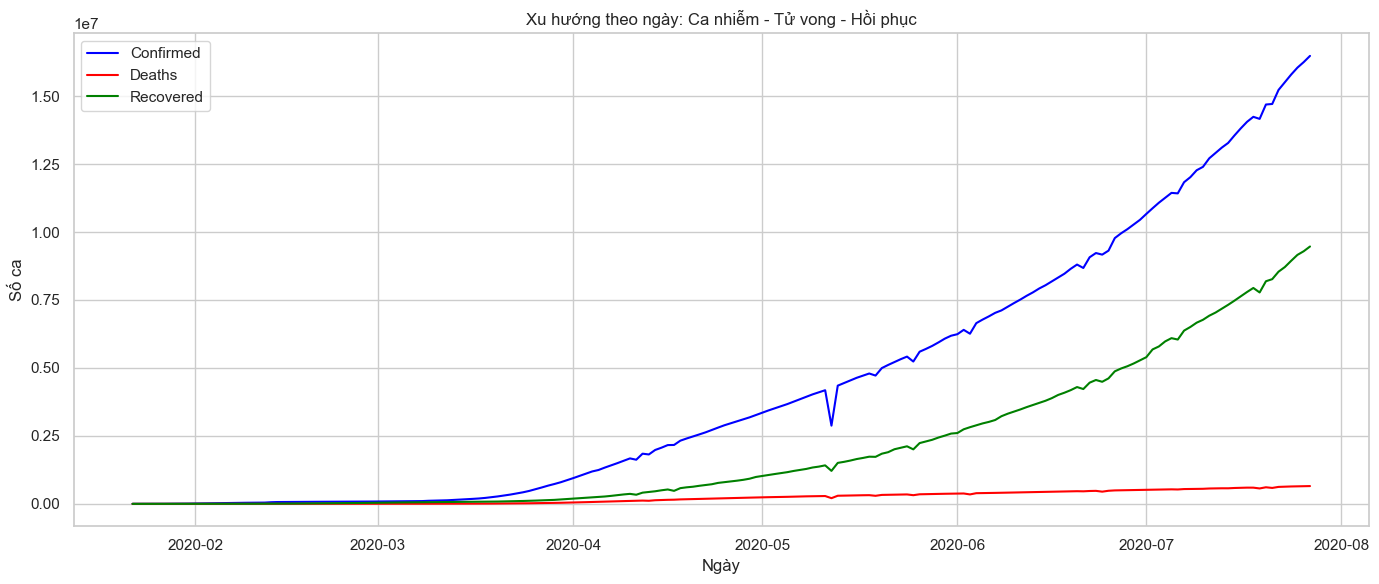

In [316]:
import matplotlib.pyplot as plt

# Đảm bảo cột 'date' đã là datetime
df['date'] = pd.to_datetime(df['date'])

# Gộp dữ liệu theo ngày (nếu cần)
daily_df = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Vẽ biểu đồ đường theo ngày
plt.figure(figsize=(14, 6))
plt.plot(daily_df.index, daily_df['confirmed'], label='Confirmed', color='blue')
plt.plot(daily_df.index, daily_df['deaths'], label='Deaths', color='red')
plt.plot(daily_df.index, daily_df['recovered'], label='Recovered', color='green')
plt.title('Xu hướng theo ngày: Ca nhiễm - Tử vong - Hồi phục')
plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


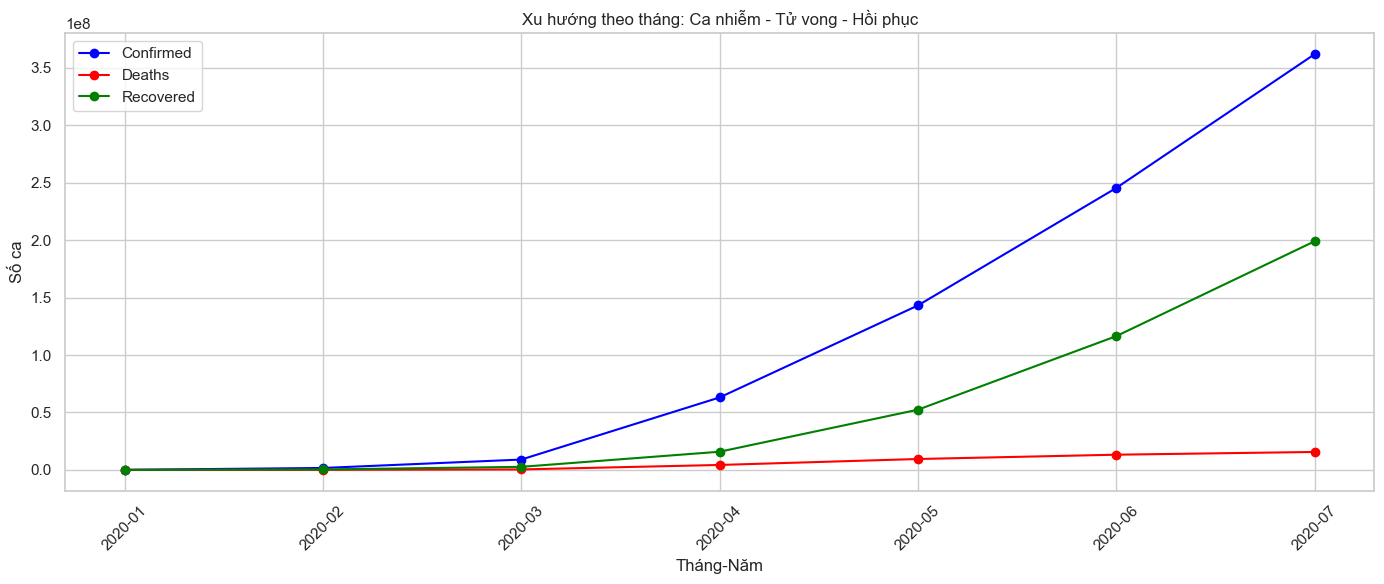

In [317]:
# Gộp dữ liệu theo tháng-năm
monthly_df = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].sum()

# Vẽ biểu đồ đường theo tháng-năm
plt.figure(figsize=(14, 6))
plt.plot(monthly_df.index, monthly_df['confirmed'], label='Confirmed', color='blue', marker='o')
plt.plot(monthly_df.index, monthly_df['deaths'], label='Deaths', color='red', marker='o')
plt.plot(monthly_df.index, monthly_df['recovered'], label='Recovered', color='green', marker='o')
plt.title('Xu hướng theo tháng: Ca nhiễm - Tử vong - Hồi phục')
plt.xlabel('Tháng-Năm')
plt.ylabel('Số ca')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [319]:
peak_confirmed = daily_df['confirmed'].idxmax()
peak_deaths = daily_df['deaths'].idxmax()
peak_recovered = daily_df['recovered'].idxmax()

print(f"🔥 Đỉnh ca nhiễm: {peak_confirmed}")
print(f"⚰️ Đỉnh tử vong: {peak_deaths}")
print(f"💪 Đỉnh hồi phục: {peak_recovered}")


🔥 Đỉnh ca nhiễm: 2020-07-27 00:00:00
⚰️ Đỉnh tử vong: 2020-07-27 00:00:00
💪 Đỉnh hồi phục: 2020-07-27 00:00:00


Hoặc cách khác

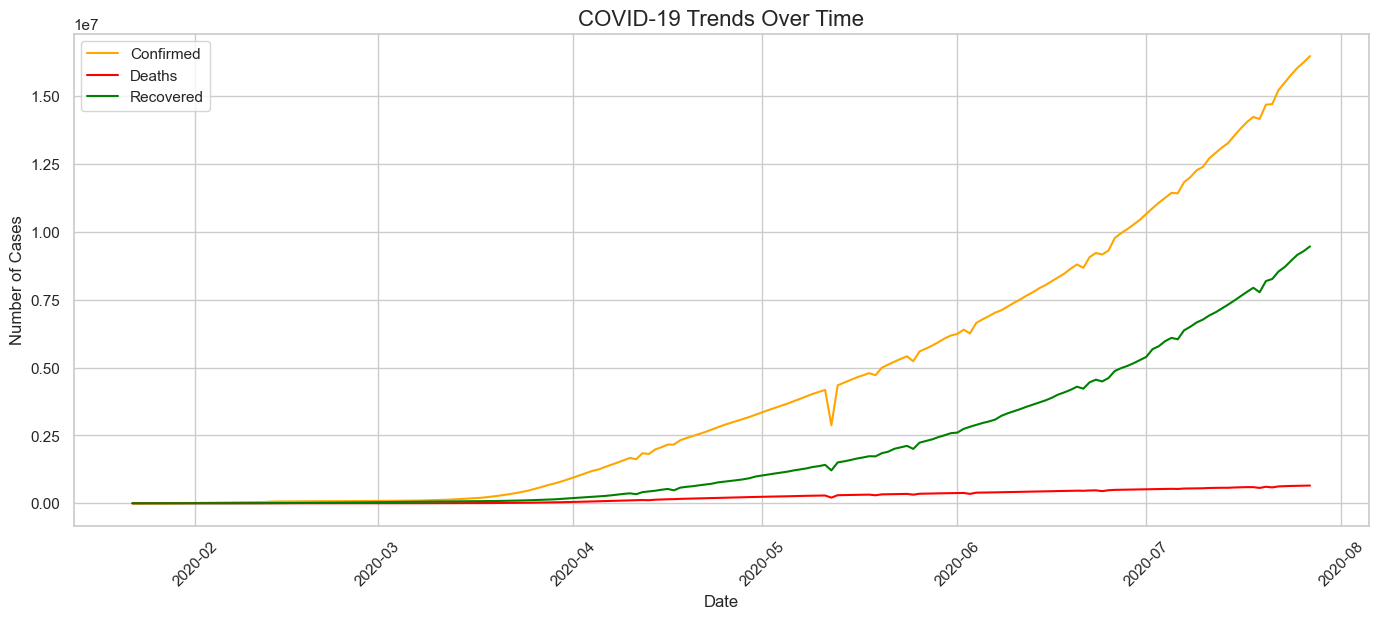

📈 Peak Confirmed: 2020-07-27 with 16480485 cases
💀 Peak Deaths: 2020-07-27 with 654036 deaths
💚 Peak Recovered: 2020-07-27 with 9468087 recoveries


In [320]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu (nếu chưa có df)
# df = pd.read_csv('your_cleaned_file.csv')

# Đảm bảo cột 'date' là dạng datetime
df['date'] = pd.to_datetime(df['date'])

# Gộp dữ liệu theo ngày nếu có nhiều bản ghi/ngày
daily_df = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 6))
plt.plot(daily_df['date'], daily_df['confirmed'], label='Confirmed', color='orange')
plt.plot(daily_df['date'], daily_df['deaths'], label='Deaths', color='red')
plt.plot(daily_df['date'], daily_df['recovered'], label='Recovered', color='green')

plt.title('COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# 🧠 Tìm ngày đạt đỉnh
peak_confirmed = daily_df.loc[daily_df['confirmed'].idxmax()]
peak_deaths = daily_df.loc[daily_df['deaths'].idxmax()]
peak_recovered = daily_df.loc[daily_df['recovered'].idxmax()]

print("📈 Peak Confirmed:", peak_confirmed['date'].date(), "with", peak_confirmed['confirmed'], "cases")
print("💀 Peak Deaths:", peak_deaths['date'].date(), "with", peak_deaths['deaths'], "deaths")
print("💚 Peak Recovered:", peak_recovered['date'].date(), "with", peak_recovered['recovered'], "recoveries")


Cách khác: gom biểu đồ để biểu diễn cùng bảng

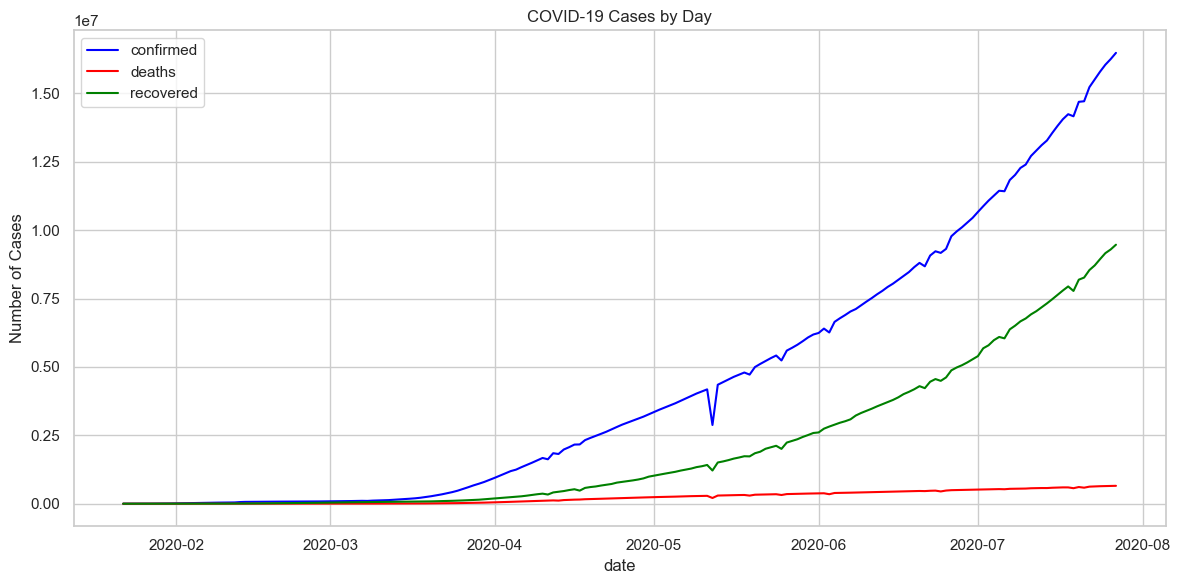

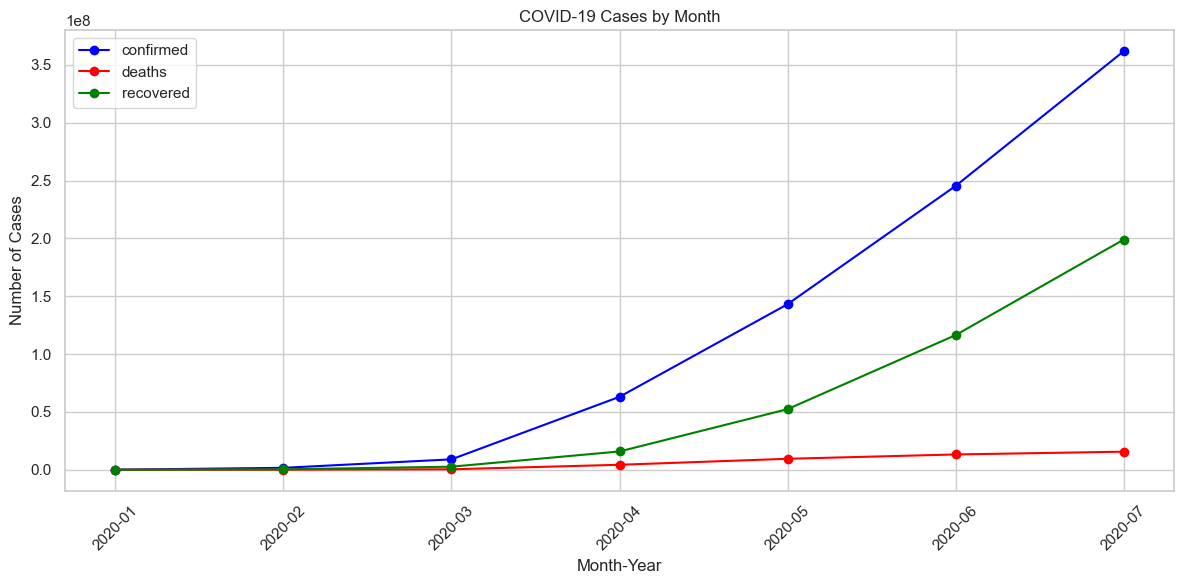

📈 Peak Confirmed: 2020-07-27 with 16480485 cases
💀 Peak Deaths: 2020-07-27 with 654036 deaths
💚 Peak Recovered: 2020-07-27 with 9468087 recoveries


In [321]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có df
# df = pd.read_csv("your_data.csv")

# Chuyển cột Date thành datetime
df['date'] = pd.to_datetime(df['date'])

# --- Biểu đồ 1: Thống kê theo ngày ---
df_daily = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['confirmed'], label='confirmed', color='blue')
plt.plot(df_daily['date'], df_daily['deaths'], label='deaths', color='red')
plt.plot(df_daily['date'], df_daily['recovered'], label='recovered', color='green')
plt.title('COVID-19 Cases by Day')
plt.xlabel('date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Biểu đồ 2: Thống kê theo tháng-năm ---
df['month_year'] = df['date'].dt.to_period('M')
df_monthly = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
df_monthly['month_year'] = df_monthly['month_year'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(df_monthly['month_year'], df_monthly['confirmed'], label='confirmed', color='blue', marker='o')
plt.plot(df_monthly['month_year'], df_monthly['deaths'], label='deaths', color='red', marker='o')
plt.plot(df_monthly['month_year'], df_monthly['recovered'], label='recovered', color='green', marker='o')
plt.title('COVID-19 Cases by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Tìm ngày đạt đỉnh
peak_confirmed = daily_df.loc[daily_df['confirmed'].idxmax()]
peak_deaths = daily_df.loc[daily_df['deaths'].idxmax()]
peak_recovered = daily_df.loc[daily_df['recovered'].idxmax()]

print("📈 Peak Confirmed:", peak_confirmed['date'].date(), "with", peak_confirmed['confirmed'], "cases")
print("💀 Peak Deaths:", peak_deaths['date'].date(), "with", peak_deaths['deaths'], "deaths")
print("💚 Peak Recovered:", peak_recovered['date'].date(), "with", peak_recovered['recovered'], "recoveries")

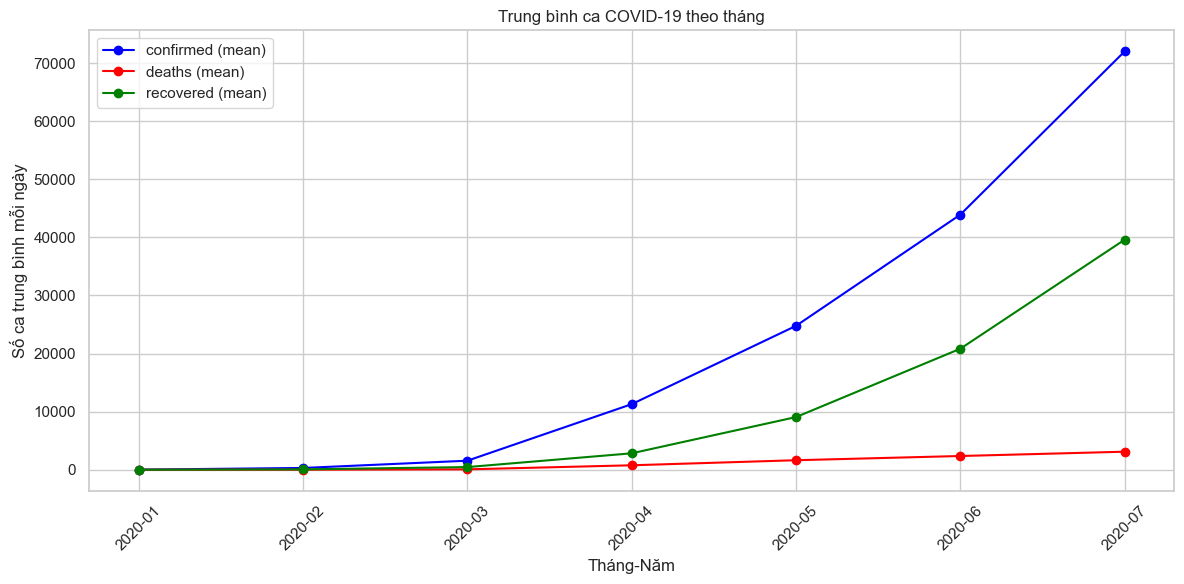

In [322]:
# --- Tính trung bình theo tháng-năm ---
df['month_year'] = df['date'].dt.to_period('M')
df_monthly_avg = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].mean().reset_index()
df_monthly_avg['month_year'] = df_monthly_avg['month_year'].astype(str)

# --- Vẽ biểu đồ trung bình ---
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['confirmed'], label='confirmed (mean)', color='blue', marker='o')
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['deaths'], label='deaths (mean)', color='red', marker='o')
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['recovered'], label='recovered (mean)', color='green', marker='o')
plt.title('Trung bình ca COVID-19 theo tháng')
plt.xlabel('Tháng-Năm')
plt.ylabel('Số ca trung bình mỗi ngày')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. So sánh giữa các quốc gia

**Dưới đây là đoạn mã Python sử dụng Pandas và Matplotlib/Seaborn để:**

-   Tính tổng số ca nhiễm, tử vong, hồi phục theo quốc gia

-   Tính tỷ lệ tử vong và tỷ lệ hồi phục

-   Tìm quốc gia có tỷ lệ tử vong cao nhất và tỷ lệ hồi phục cao nhất

-   Vẽ biểu đồ trực quan hóa dữ liệu này

In [323]:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu COVID-19, gồm các cột:
# 'country', 'confirmed', 'deaths', 'recovered'

# Bước 1: Tính tổng số ca theo từng quốc gia
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Bước 2: Tính tỷ lệ tử vong và tỷ lệ hồi phục
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Bước 3: Tìm quốc gia có tỷ lệ tử vong cao nhất
highest_death_rate = country_stats.sort_values(by='death_rate', ascending=False).head(1)

# Bước 4: Tìm quốc gia có tỷ lệ hồi phục cao nhất
highest_recovery_rate = country_stats.sort_values(by='recovery_rate', ascending=False).head(1)

# Hiển thị kết quả
print("Quốc gia có tỷ lệ tử vong cao nhất:")
print(highest_death_rate[['country_region', 'death_rate']])

print("=========================================")

print("\nQuốc gia có tỷ lệ hồi phục cao nhất:")
print(highest_recovery_rate[['country_region', 'recovery_rate']])



Quốc gia có tỷ lệ tử vong cao nhất:
    country_region  death_rate
184          Yemen    0.263822

Quốc gia có tỷ lệ hồi phục cao nhất:
    country_region  recovery_rate
100  Liechtenstein       0.914167


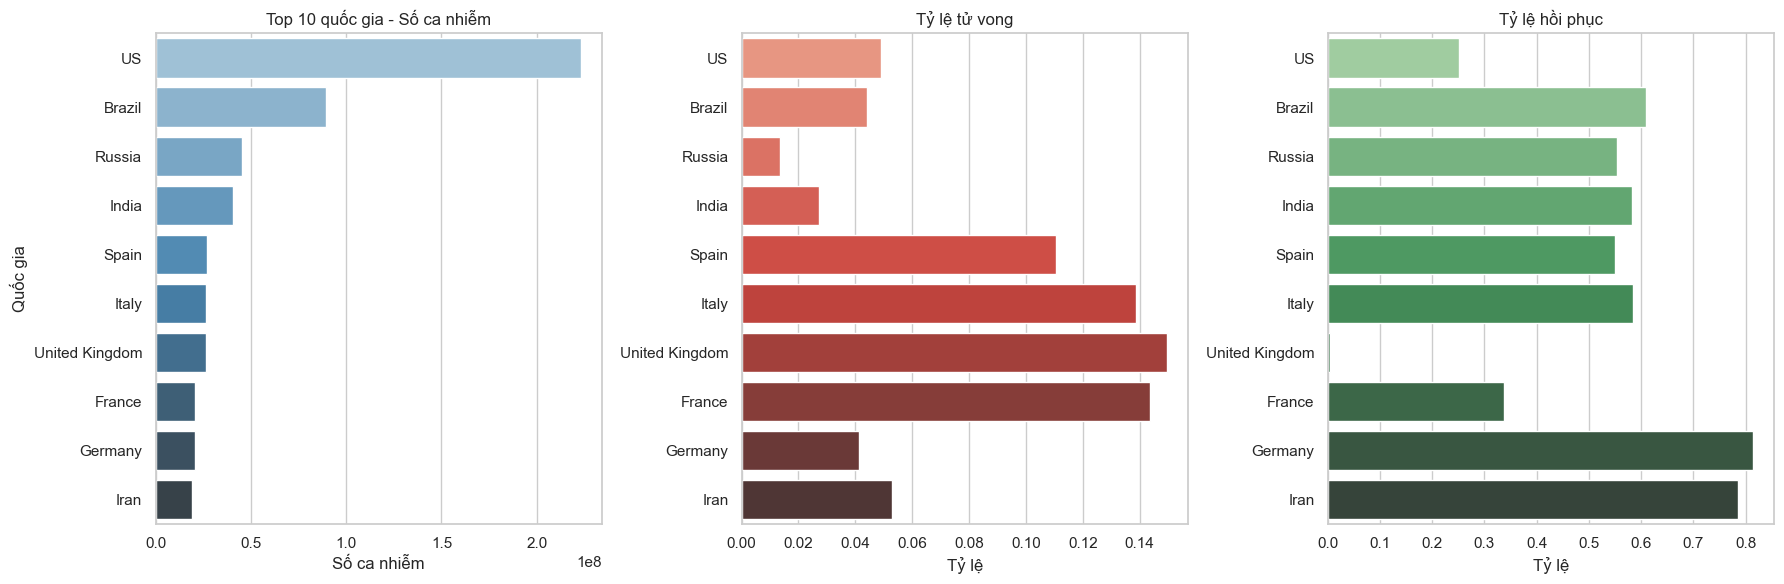

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là dataframe đã load và các cột đều viết thường
df = df.copy()
df.columns = df.columns.str.lower()

# Tính tổng số theo quốc gia
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Top 10 quốc gia có số ca nhiễm cao nhất
top10 = country_stats.sort_values('confirmed', ascending=False).head(10)

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set_style("whitegrid")

# Biểu đồ 1: Tổng số ca nhiễm
sns.barplot(data=top10, y='country_region', x='confirmed', hue='country_region', palette='Blues_d', legend=False, ax=axes[0])
axes[0].set_title('Top 10 quốc gia - Số ca nhiễm')
axes[0].set_xlabel('Số ca nhiễm')
axes[0].set_ylabel('Quốc gia')

# Biểu đồ 2: Tỷ lệ tử vong
sns.barplot(data=top10, y='country_region', x='death_rate', hue='country_region', palette='Reds_d', legend=False, ax=axes[1])
axes[1].set_title('Tỷ lệ tử vong')
axes[1].set_xlabel('Tỷ lệ')
axes[1].set_ylabel('')

# Biểu đồ 3: Tỷ lệ hồi phục
sns.barplot(data=top10, y='country_region', x='recovery_rate', hue='country_region', palette='Greens_d', legend=False, ax=axes[2])
axes[2].set_title('Tỷ lệ hồi phục')
axes[2].set_xlabel('Tỷ lệ')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


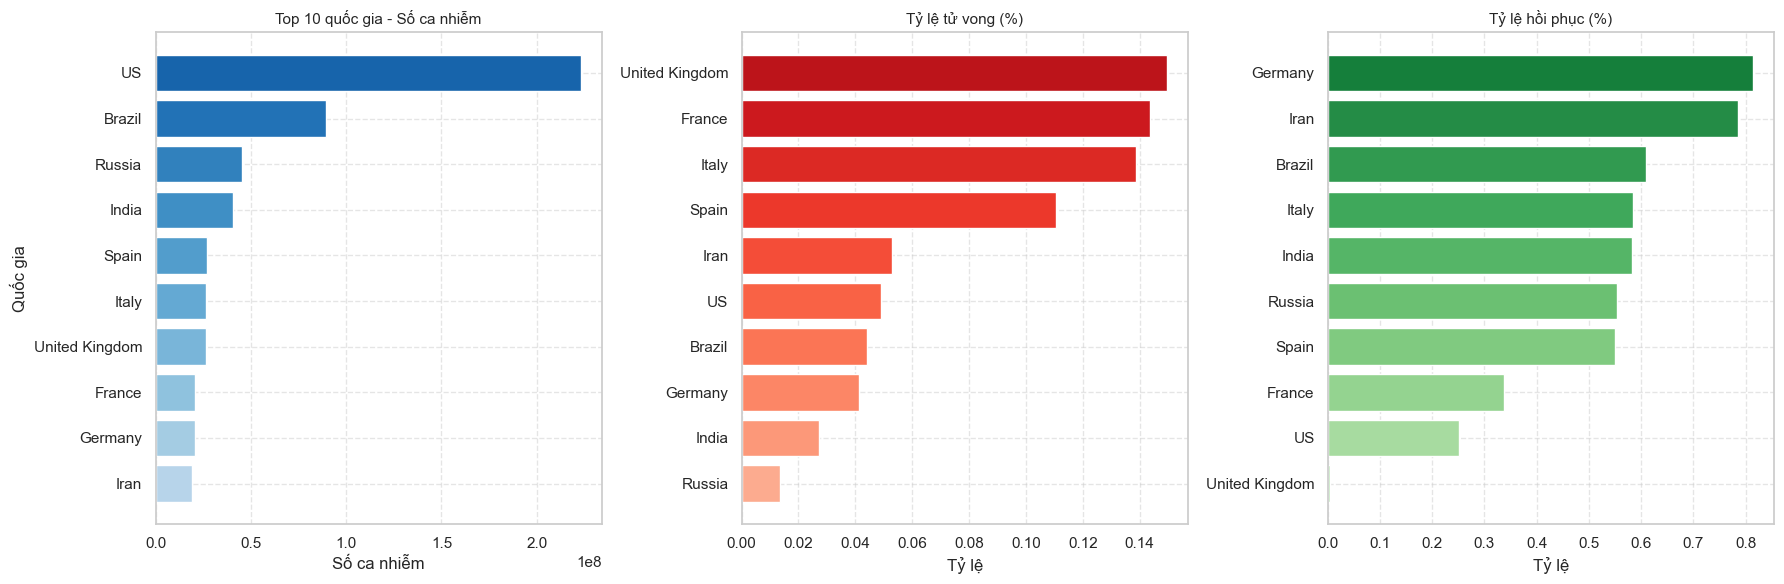

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df là dataframe đã load và các cột đều viết thường
df = df.copy()
df.columns = df.columns.str.lower()

# Tính tổng số theo quốc gia
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Top 10 quốc gia có số ca nhiễm cao nhất
top10 = country_stats.sort_values('confirmed', ascending=False).head(10)

# Sắp xếp từng biểu đồ cho dễ nhìn
dfplot1 = top10.sort_values('confirmed', ascending=True)
dfplot2 = top10.sort_values('death_rate', ascending=True)
dfplot3 = top10.sort_values('recovery_rate', ascending=True)

# Tạo layout
plt.figure(figsize=(18, 6))

# --- Subplot 1: Tổng số ca nhiễm ---
plt.subplot(1, 3, 1)
plt.barh(
    y = dfplot1['country_region'],
    width = dfplot1['confirmed'],
    color = plt.cm.Blues(np.linspace(0.3, 0.8, len(dfplot1)))
)
plt.title('Top 10 quốc gia - Số ca nhiễm', fontsize=11)
plt.xlabel('Số ca nhiễm')
plt.ylabel('Quốc gia')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Tỷ lệ tử vong ---
plt.subplot(1, 3, 2)
plt.barh(
    y = dfplot2['country_region'],
    width = dfplot2['death_rate'],
    color = plt.cm.Reds(np.linspace(0.3, 0.8, len(dfplot2)))
)
plt.title('Tỷ lệ tử vong (%)', fontsize=11)
plt.xlabel('Tỷ lệ')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 3: Tỷ lệ hồi phục ---
plt.subplot(1, 3, 3)
plt.barh(
    y = dfplot3['country_region'],
    width = dfplot3['recovery_rate'],
    color = plt.cm.Greens(np.linspace(0.3, 0.8, len(dfplot3)))
)
plt.title('Tỷ lệ hồi phục (%)', fontsize=11)
plt.xlabel('Tỷ lệ')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.5)

# Hoàn tất bố cục
plt.tight_layout()
plt.show()


Phân tích riêng cho nước Anh (United Kingdom)

Thống kê COVID-19 tại United Kingdom:
- Tổng số ca nhiễm: 26,388,768
- Tổng số ca tử vong: 3,944,824
- Tổng số ca hồi phục: 124,701
- Tỷ lệ tử vong: 14.95%
- Tỷ lệ hồi phục: 0.47%


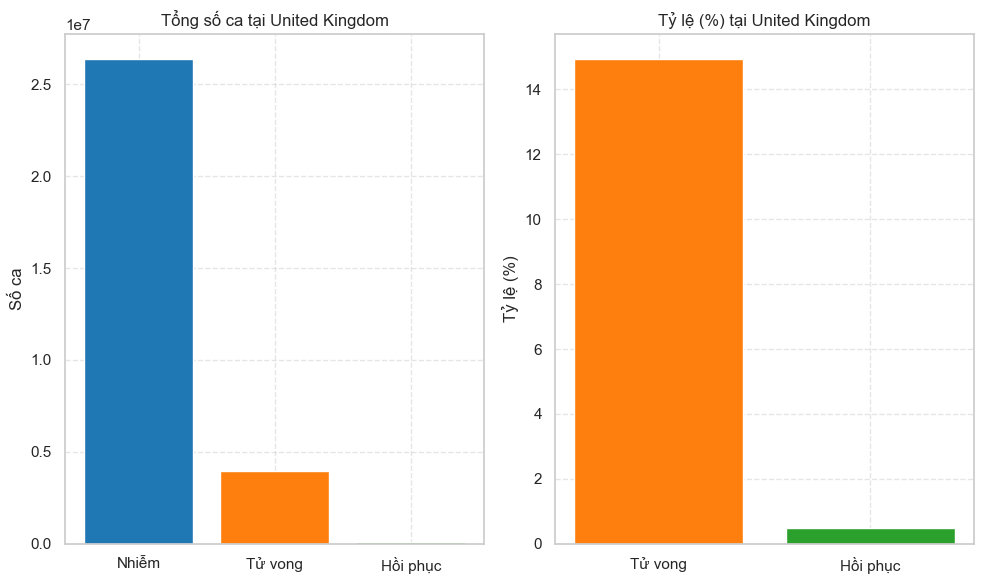

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df là dataframe đã load và các cột đều viết thường
df = df.copy()
df.columns = df.columns.str.lower()

# Lọc dữ liệu cho United Kingdom
uk_data = df[df['country_region'] == 'United Kingdom'].copy()

# Tính tổng số ca nhiễm, tử vong và hồi phục
uk_stats = uk_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ tử vong và hồi phục
uk_stats['death_rate'] = uk_stats['deaths'] / uk_stats['confirmed']
uk_stats['recovery_rate'] = uk_stats['recovered'] / uk_stats['confirmed']

# In thông tin tổng quan
print("Thống kê COVID-19 tại United Kingdom:")
print(f"- Tổng số ca nhiễm: {uk_stats['confirmed'].values[0]:,}")
print(f"- Tổng số ca tử vong: {uk_stats['deaths'].values[0]:,}")
print(f"- Tổng số ca hồi phục: {uk_stats['recovered'].values[0]:,}")
print(f"- Tỷ lệ tử vong: {uk_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Tỷ lệ hồi phục: {uk_stats['recovery_rate'].values[0] * 100:.2f}%")

# Vẽ biểu đồ cho United Kingdom
plt.figure(figsize=(10, 6))

# --- Subplot 1: Tổng số ca nhiễm, tử vong, hồi phục ---
plt.subplot(1, 2, 1)
categories = ['Nhiễm', 'Tử vong', 'Hồi phục']
values = [
    uk_stats['confirmed'].values[0],
    uk_stats['deaths'].values[0],
    uk_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(categories, values, color=colors)
plt.title('Tổng số ca tại United Kingdom')
plt.ylabel('Số ca')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Tỷ lệ tử vong và hồi phục ---
plt.subplot(1, 2, 2)
rates = ['Tử vong', 'Hồi phục']
rate_values = [
    uk_stats['death_rate'].values[0] * 100,
    uk_stats['recovery_rate'].values[0] * 100
]
plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])
plt.title('Tỷ lệ (%) tại United Kingdom')
plt.ylabel('Tỷ lệ (%)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Thống kê COVID-19 tại United Kingdom:
- Tổng số ca nhiễm: 26,388,768
- Tổng số ca tử vong: 3,944,824
- Tổng số ca hồi phục: 124,701
- Tỷ lệ tử vong: 14.95%
- Tỷ lệ hồi phục: 0.47%


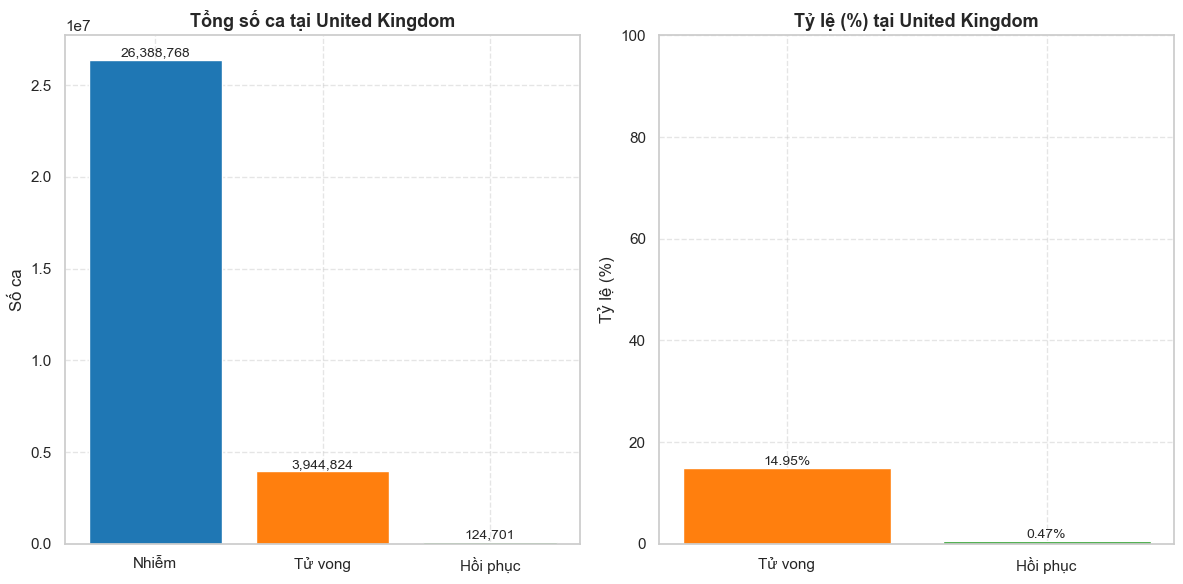

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df đã load từ trước
df = df.copy()
df.columns = df.columns.str.lower()

# Lọc dữ liệu cho United Kingdom
uk_data = df[df['country_region'] == 'United Kingdom'].copy()

# Tính tổng số ca nhiễm, tử vong và hồi phục
uk_stats = uk_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ tử vong và hồi phục
uk_stats['death_rate'] = uk_stats['deaths'] / uk_stats['confirmed']
uk_stats['recovery_rate'] = uk_stats['recovered'] / uk_stats['confirmed']

# In thông tin tổng quan
print("Thống kê COVID-19 tại United Kingdom:")
print(f"- Tổng số ca nhiễm: {uk_stats['confirmed'].values[0]:,}")
print(f"- Tổng số ca tử vong: {uk_stats['deaths'].values[0]:,}")
print(f"- Tổng số ca hồi phục: {uk_stats['recovered'].values[0]:,}")
print(f"- Tỷ lệ tử vong: {uk_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Tỷ lệ hồi phục: {uk_stats['recovery_rate'].values[0] * 100:.2f}%")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# --- Subplot 1: Tổng số ca ---
plt.subplot(1, 2, 1)
categories = ['Nhiễm', 'Tử vong', 'Hồi phục']
values = [
    uk_stats['confirmed'].values[0],
    uk_stats['deaths'].values[0],
    uk_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars1 = plt.bar(categories, values, color=colors)

# Thêm nhãn giá trị
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Tổng số ca tại United Kingdom', fontsize=13, fontweight='bold')
plt.ylabel('Số ca')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Tỷ lệ (%) ---
plt.subplot(1, 2, 2)
rates = ['Tử vong', 'Hồi phục']
rate_values = [
    uk_stats['death_rate'].values[0] * 100,
    uk_stats['recovery_rate'].values[0] * 100
]
bars2 = plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])

# Thêm nhãn giá trị phần trăm
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Tỷ lệ (%) tại United Kingdom', fontsize=13, fontweight='bold')
plt.ylabel('Tỷ lệ (%)')
plt.ylim(0, 100)  # Giới hạn từ 0–100% để biểu đồ trực quan hơn
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



Phân tích riêng cho nước Mỹ (USA)

Thống kê COVID-19 tại US:
- Tổng số ca nhiễm: 222,970,796
- Tổng số ca tử vong: 10,927,928
- Tổng số ca hồi phục: 56,123,129
- Tỷ lệ tử vong: 4.90%
- Tỷ lệ hồi phục: 25.17%


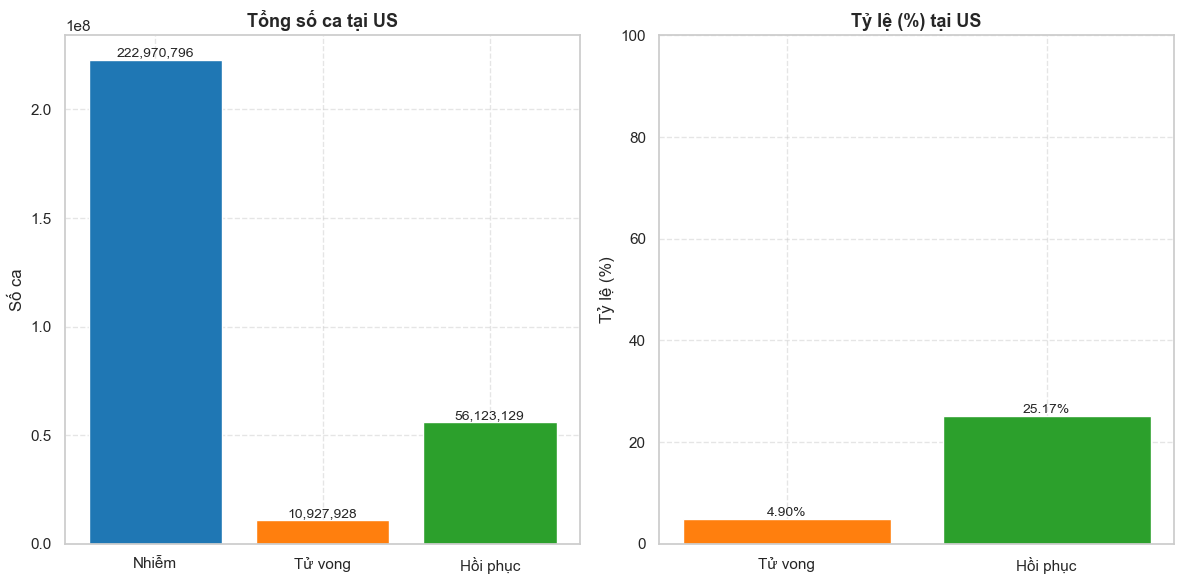

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df đã load từ trước
df = df.copy()
df.columns = df.columns.str.lower()

# Lọc dữ liệu cho US
us_data = df[df['country_region'] == 'US'].copy()

# Tính tổng số ca nhiễm, tử vong và hồi phục
us_stats = us_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ tử vong và hồi phục
us_stats['death_rate'] = us_stats['deaths'] / us_stats['confirmed']
us_stats['recovery_rate'] = us_stats['recovered'] / us_stats['confirmed']

# In thông tin tổng quan
print("Thống kê COVID-19 tại US:")
print(f"- Tổng số ca nhiễm: {us_stats['confirmed'].values[0]:,}")
print(f"- Tổng số ca tử vong: {us_stats['deaths'].values[0]:,}")
print(f"- Tổng số ca hồi phục: {us_stats['recovered'].values[0]:,}")
print(f"- Tỷ lệ tử vong: {us_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Tỷ lệ hồi phục: {us_stats['recovery_rate'].values[0] * 100:.2f}%")

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# --- Subplot 1: Tổng số ca ---
plt.subplot(1, 2, 1)
categories = ['Nhiễm', 'Tử vong', 'Hồi phục']
values = [
    us_stats['confirmed'].values[0],
    us_stats['deaths'].values[0],
    us_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars1 = plt.bar(categories, values, color=colors)

# Thêm nhãn giá trị
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Tổng số ca tại US', fontsize=13, fontweight='bold')
plt.ylabel('Số ca')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Tỷ lệ (%) ---
plt.subplot(1, 2, 2)
rates = ['Tử vong', 'Hồi phục']
rate_values = [
    us_stats['death_rate'].values[0] * 100,
    us_stats['recovery_rate'].values[0] * 100
]
bars2 = plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])

# Thêm nhãn giá trị phần trăm
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Tỷ lệ (%) tại US', fontsize=13, fontweight='bold')
plt.ylabel('Tỷ lệ (%)')
plt.ylim(0, 100)  # Giới hạn từ 0–100% để biểu đồ trực quan hơn
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



### 3. Tỷ lệ tử vong và hồi phục theo thời gian

In [331]:
# Tính tỷ lệ tử vong và hồi phục

import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu COVID-19
df['death_rate'] = df['deaths'] / df['confirmed']
df['recovery_rate'] = df['recovered'] / df['confirmed']


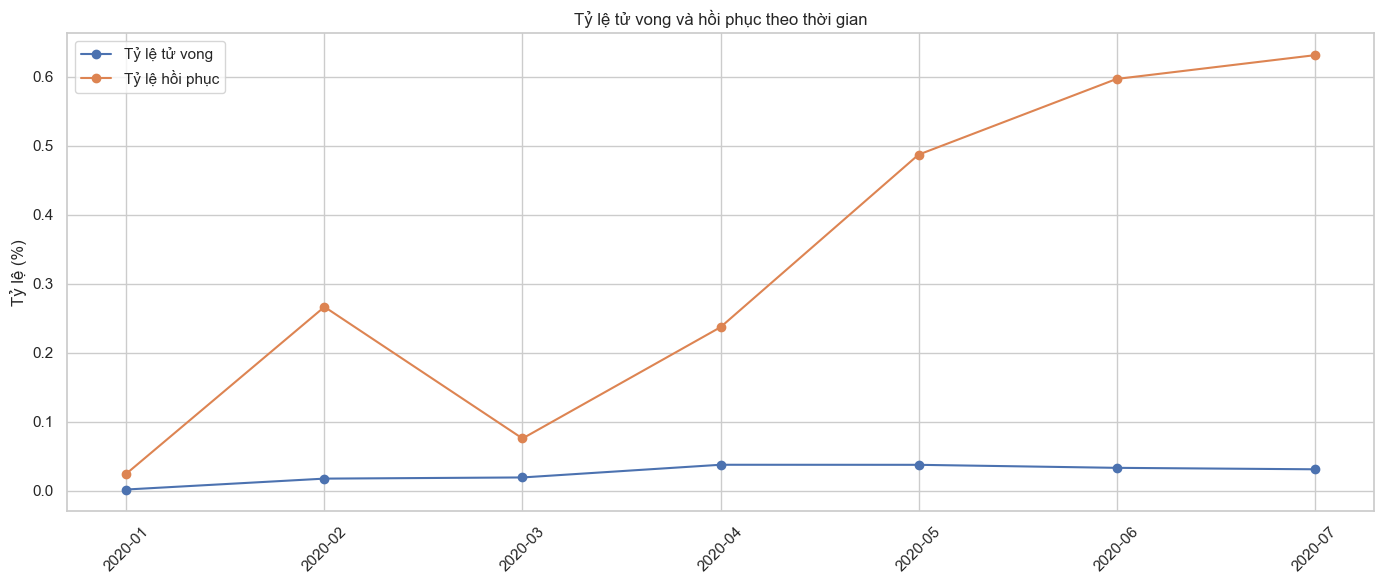

In [332]:
# So sánh theo thời gian (vd: theo tháng-năm)

# Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Tạo cột 'month_year'
df['month_year'] = df['date'].dt.to_period('M').astype(str)

# Trung bình tỷ lệ theo tháng-năm
monthly = df.groupby('month_year')[['death_rate', 'recovery_rate']].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly['month_year'], monthly['death_rate'], label='Tỷ lệ tử vong', marker='o')
plt.plot(monthly['month_year'], monthly['recovery_rate'], label='Tỷ lệ hồi phục', marker='o')
plt.xticks(rotation=45)
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ tử vong và hồi phục theo thời gian")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


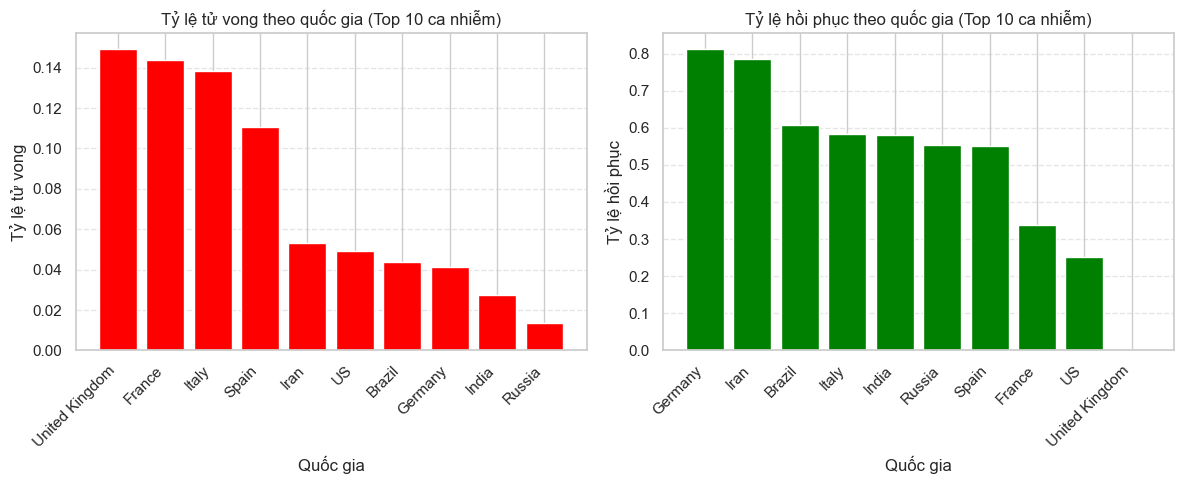

In [333]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính tỷ lệ tử vong và hồi phục
df_plot = df[['country_region', 'confirmed', 'deaths', 'recovered']].copy()
df_plot = df_plot.groupby('country_region').sum().reset_index()

# Bỏ các nước có confirmed = 0 để tránh chia cho 0
df_plot = df_plot[df_plot['confirmed'] > 0]

df_plot['death_rate'] = df_plot['deaths'] / df_plot['confirmed']
df_plot['recovery_rate'] = df_plot['recovered'] / df_plot['confirmed']

# Chọn top 10 nước có số ca nhiễm cao nhất
top10 = df_plot.sort_values('confirmed', ascending=False).head(10)

# Sắp xếp theo death_rate để biểu đồ đẹp hơn
top10 = top10.sort_values('death_rate', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Subplot 1: Tỷ lệ tử vong
plt.subplot(1, 2, 1)
plt.bar(top10['country_region'], top10['death_rate'], color='red')
plt.title('Tỷ lệ tử vong theo quốc gia (Top 10 ca nhiễm)', fontsize=12)
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ tử vong')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Subplot 2: Tỷ lệ hồi phục
plt.subplot(1, 2, 2)
# Sắp xếp riêng theo recovery_rate
top10_recovery = top10.sort_values('recovery_rate', ascending=False)
plt.bar(top10_recovery['country_region'], top10_recovery['recovery_rate'], color='green')
plt.title('Tỷ lệ hồi phục theo quốc gia (Top 10 ca nhiễm)', fontsize=12)
plt.xlabel('Quốc gia')
plt.ylabel('Tỷ lệ hồi phục')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tối ưu layout
plt.tight_layout()
plt.show()


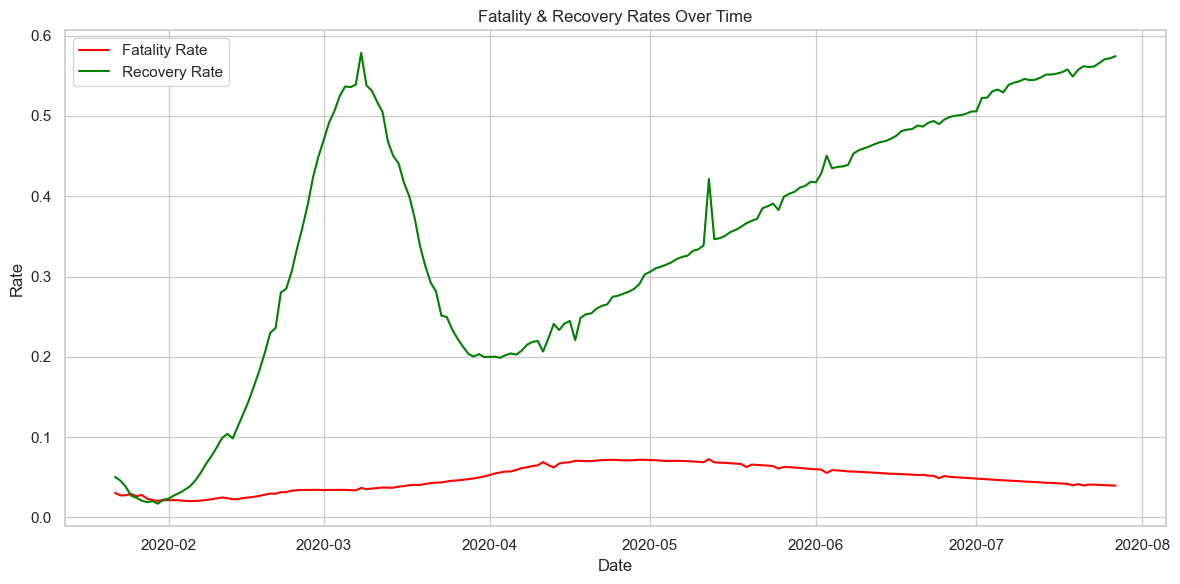

In [334]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử cột tên như sau (viết thường hết): 'date', 'confirmed', 'deaths', 'recovered'
# Nếu chưa, hãy đổi tên cột tương ứng
df['date'] = pd.to_datetime(df['date'])

# Nhóm theo ngày
daily_stats = df.groupby('date').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).reset_index()

# Tính tỷ lệ
daily_stats['fatality_rate'] = daily_stats['deaths'] / daily_stats['confirmed']
daily_stats['recovery_rate'] = daily_stats['recovered'] / daily_stats['confirmed']

# Loại bỏ các dòng có confirmed = 0 (tránh chia cho 0)
daily_stats = daily_stats[daily_stats['confirmed'] > 0]

# Vẽ biểu đồ line
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['date'], daily_stats['fatality_rate'], label='Fatality Rate', color='red')
plt.plot(daily_stats['date'], daily_stats['recovery_rate'], label='Recovery Rate', color='green')
plt.title('Fatality & Recovery Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


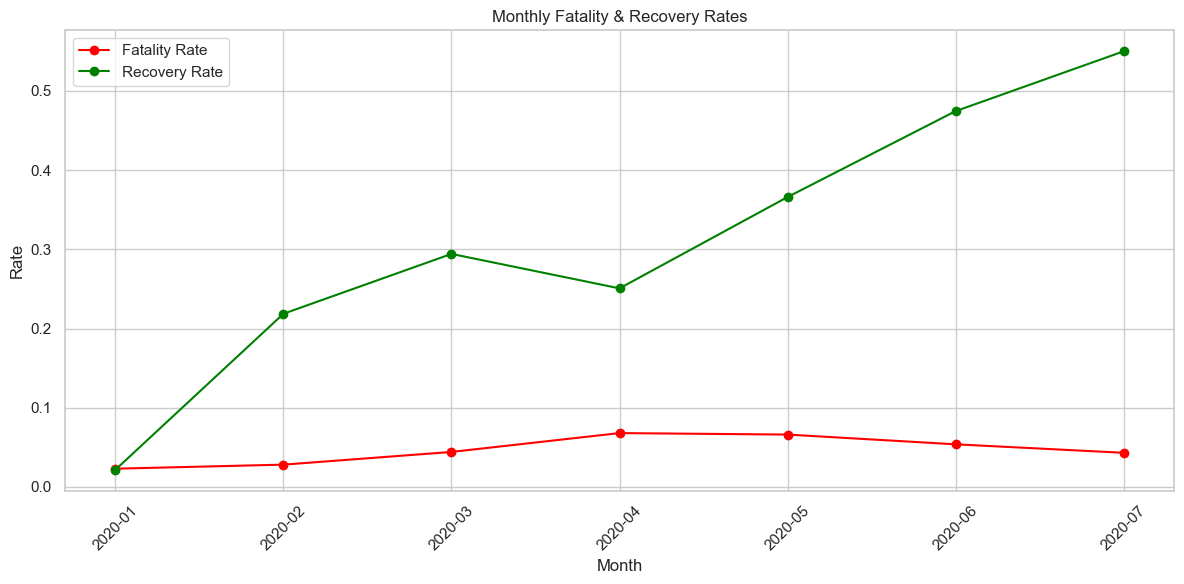

In [335]:
df['month'] = df['date'].dt.to_period('M')
monthly_stats = df.groupby('month').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).reset_index()

monthly_stats['fatality_rate'] = monthly_stats['deaths'] / monthly_stats['confirmed']
monthly_stats['recovery_rate'] = monthly_stats['recovered'] / monthly_stats['confirmed']
monthly_stats = monthly_stats[monthly_stats['confirmed'] > 0]

# Vẽ lại
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['month'].astype(str), monthly_stats['fatality_rate'], label='Fatality Rate', marker='o', color='red')
plt.plot(monthly_stats['month'].astype(str), monthly_stats['recovery_rate'], label='Recovery Rate', marker='o', color='green')
plt.title('Monthly Fatality & Recovery Rates')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 4. Phân tích theo nhóm thời gian

In [336]:
# Tạo nhóm thời gian theo quý và năm

# Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Thêm cột 'year' và 'quarter'
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)  # VD: '2020Q1'

# Tính tỷ lệ tử vong và hồi phục (nếu chưa tính)
df['death_rate'] = df['deaths'] / df['confirmed'] * 100
df['recovery_rate'] = df['recovered'] / df['confirmed'] * 100

# Nhóm theo quý
quarterly = df.groupby('quarter')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()


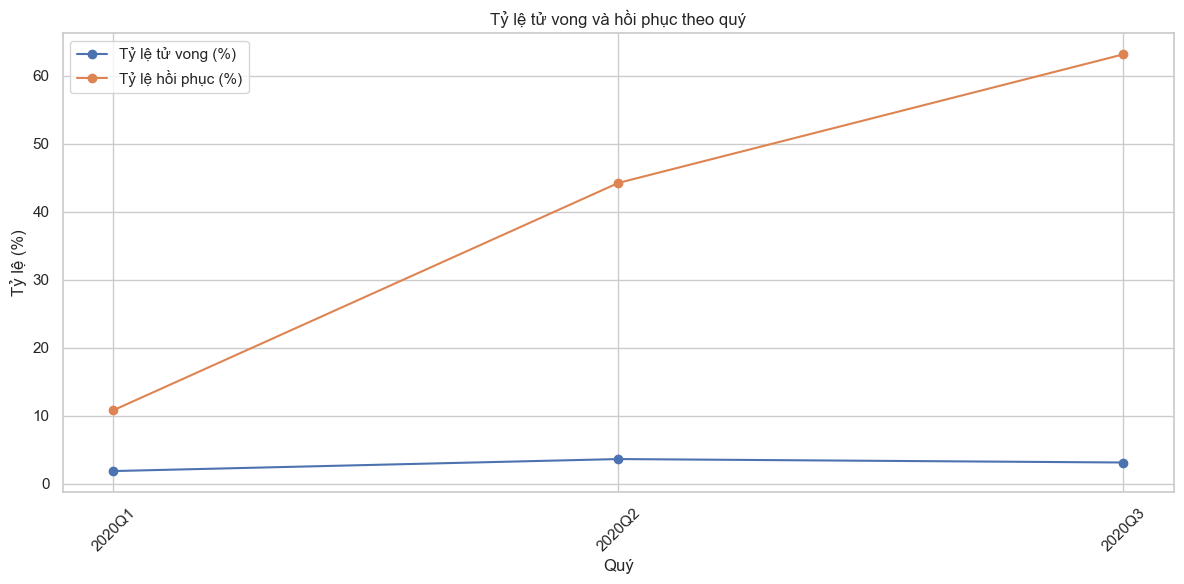

In [337]:
# Vẽ biểu đồ theo quý

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(quarterly['quarter'], quarterly['death_rate'], label='Tỷ lệ tử vong (%)', marker='o')
plt.plot(quarterly['quarter'], quarterly['recovery_rate'], label='Tỷ lệ hồi phục (%)', marker='o')
plt.xticks(rotation=45)
plt.title("Tỷ lệ tử vong và hồi phục theo quý")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Quý")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [339]:
# So sánh theo giai đoạn lockdown hoặc vaccine rollout

# Gắn nhãn thủ công dựa theo mốc thời gian
def classify_period(date):
    if date < pd.Timestamp('2020-04-01'):
        return 'Trước lockdown'
    elif date < pd.Timestamp('2021-01-01'):
        return 'Trong lockdown'
    elif date < pd.Timestamp('2021-06-01'):
        return 'Vaccine rollout'
    else:
        return 'Hậu vaccine'

df['period'] = df['date'].apply(classify_period)

# Tính trung bình theo giai đoạn
period_stats = df.groupby('period')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()


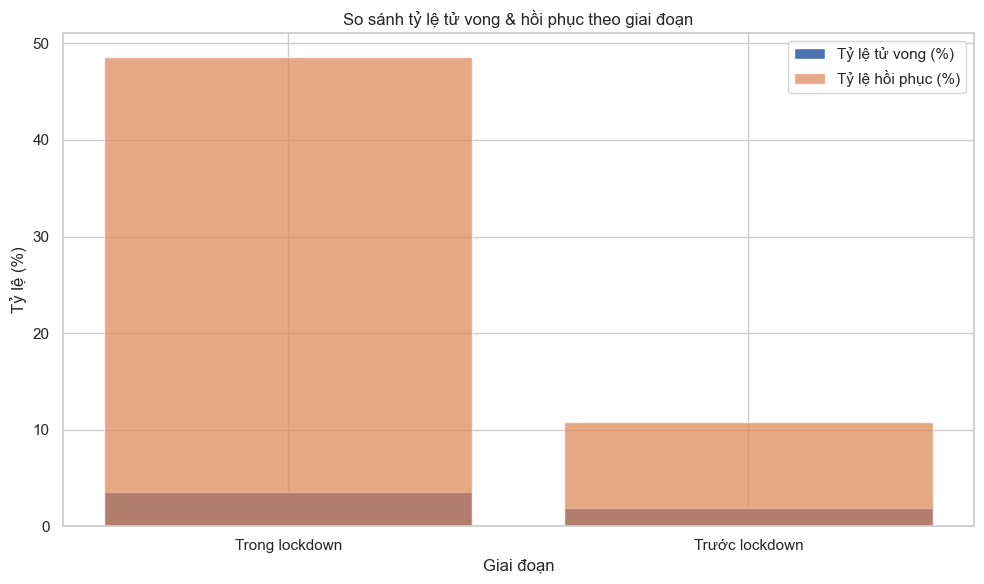

In [340]:
# Vẽ biểu đồ theo giai đoạn

plt.figure(figsize=(10,6))
plt.bar(period_stats['period'], period_stats['death_rate'], label='Tỷ lệ tử vong (%)')
plt.bar(period_stats['period'], period_stats['recovery_rate'], label='Tỷ lệ hồi phục (%)', alpha=0.7)
plt.title("So sánh tỷ lệ tử vong & hồi phục theo giai đoạn")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Giai đoạn")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


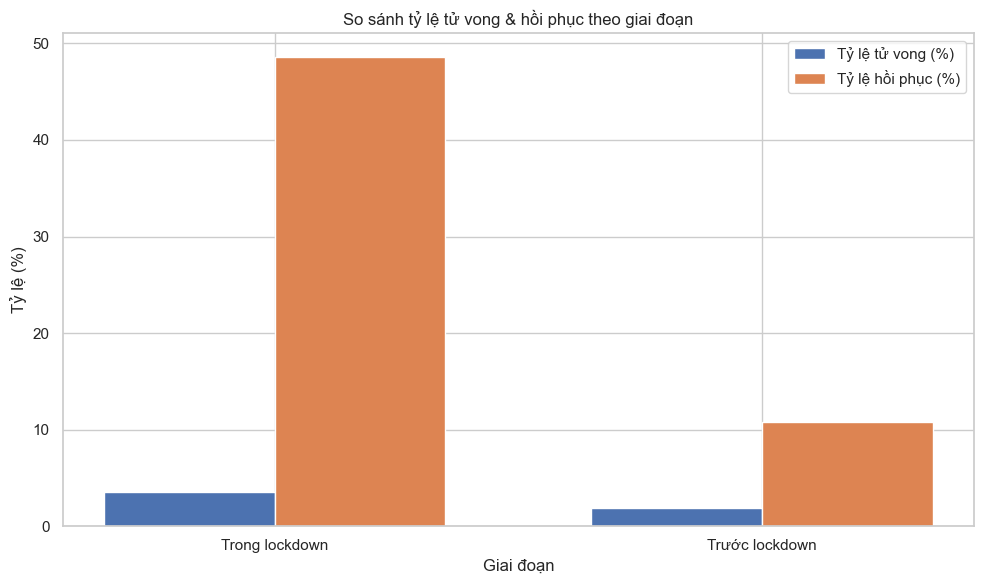

In [341]:
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập độ rộng cột và vị trí
bar_width = 0.35
x = np.arange(len(period_stats))  # Vị trí của các nhóm

plt.figure(figsize=(10, 6))

# Vẽ từng nhóm cột
plt.bar(x - bar_width/2, period_stats['death_rate'], width=bar_width, label='Tỷ lệ tử vong (%)')
plt.bar(x + bar_width/2, period_stats['recovery_rate'], width=bar_width, label='Tỷ lệ hồi phục (%)')

# Gán nhãn và thiết lập biểu đồ
plt.title("So sánh tỷ lệ tử vong & hồi phục theo giai đoạn")
plt.xlabel("Giai đoạn")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(x, period_stats['period'])  # Nhãn trục x theo từng giai đoạn
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


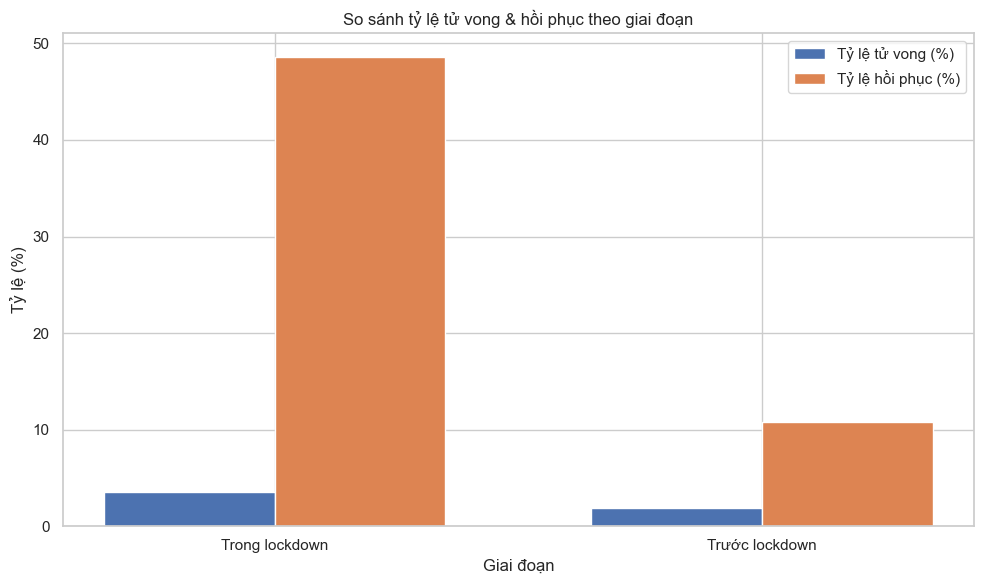

In [342]:
import numpy as np

plt.figure(figsize=(10,6))

x = np.arange(len(period_stats['period']))  # Vị trí các cột
width = 0.35  # Độ rộng của từng cột

plt.bar(x - width/2, period_stats['death_rate'], width, label='Tỷ lệ tử vong (%)')
plt.bar(x + width/2, period_stats['recovery_rate'], width, label='Tỷ lệ hồi phục (%)')

plt.xticks(x, period_stats['period'])
plt.title("So sánh tỷ lệ tử vong & hồi phục theo giai đoạn")
plt.ylabel("Tỷ lệ (%)")
plt.xlabel("Giai đoạn")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


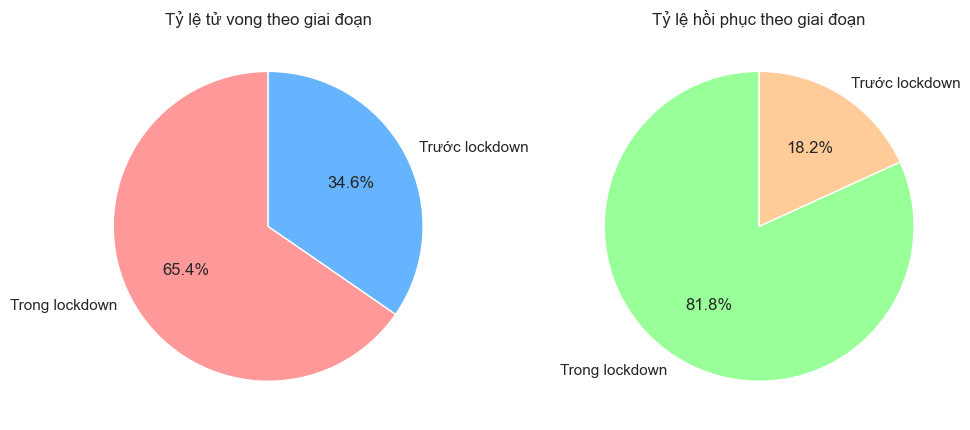

In [343]:
import matplotlib.pyplot as plt

# Bước 1: Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Bước 2: Gắn nhãn giai đoạn
df['period'] = df['date'].apply(lambda x: 'Trước lockdown' if x < pd.Timestamp('2020-04-01') else 'Trong lockdown')

# Bước 3: Tính trung bình tỷ lệ tử vong và hồi phục theo giai đoạn
period_stats = df.groupby('period')[['death_rate', 'recovery_rate']].mean().reset_index()

# Bước 4: Vẽ 2 biểu đồ pie trong 1 hàng 2 cột
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ pie: Tỷ lệ tử vong
axs[0].pie(period_stats['death_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#ff9999','#66b3ff'])
axs[0].set_title("Tỷ lệ tử vong theo giai đoạn")

# Biểu đồ pie: Tỷ lệ hồi phục
axs[1].pie(period_stats['recovery_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#99ff99','#ffcc99'])
axs[1].set_title("Tỷ lệ hồi phục theo giai đoạn")

plt.tight_layout()
plt.show()


Cách khác hợp lý hơn

In [345]:
# Bước 1: Chuẩn bị dữ liệu và tạo nhóm thời gian

import pandas as pd

# Đảm bảo cột 'date' là datetime
df['date'] = pd.to_datetime(df['date'])

# Tạo cột năm và quý
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)

# Nhóm theo quý để tính tổng
df_quarter = df.groupby('quarter')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ tử vong và tỷ lệ hồi phục
df_quarter['death_rate'] = df_quarter['deaths'] / df_quarter['confirmed']
df_quarter['recovery_rate'] = df_quarter['recovered'] / df_quarter['confirmed']


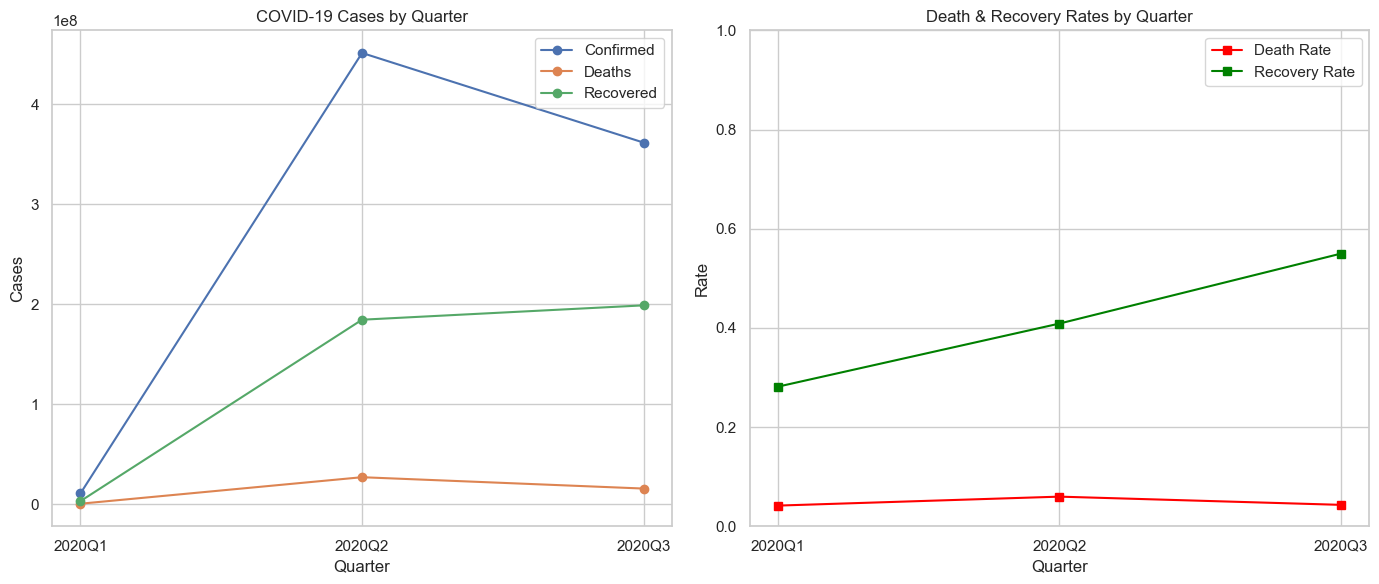

In [346]:
# Bước 2: Vẽ biểu đồ theo quý

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Biểu đồ 1: Số ca
plt.subplot(1, 2, 1)
plt.plot(df_quarter['quarter'], df_quarter['confirmed'], marker='o', label='Confirmed')
plt.plot(df_quarter['quarter'], df_quarter['deaths'], marker='o', label='Deaths')
plt.plot(df_quarter['quarter'], df_quarter['recovered'], marker='o', label='Recovered')
plt.title('COVID-19 Cases by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)

# Biểu đồ 2: Tỷ lệ tử vong và hồi phục
plt.subplot(1, 2, 2)
plt.plot(df_quarter['quarter'], df_quarter['death_rate'], marker='s', label='Death Rate', color='red')
plt.plot(df_quarter['quarter'], df_quarter['recovery_rate'], marker='s', label='Recovery Rate', color='green')
plt.title('Death & Recovery Rates by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Rate')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 5. Phân tích mức độ bùng phát

Do có số âm nân cần xử lý trước khi vẽ biểu đồ.

Dưới đây là đoạn code hoàn chỉnh đã được gộp lại, bao gồm các bước:

-   Đọc dữ liệu

-   Tiền xử lý

-   Loại bỏ giá trị âm ở các cột liên quan

-   Phân tích trước và sau lockdown

In [351]:
import pandas as pd

# 1. Đọc dữ liệu
# df = pd.read_csv('vietnam_covid_data.csv')

# 2. Đảm bảo kiểu dữ liệu datetime
df['date'] = pd.to_datetime(df['date'])

# 3. Thêm cột 'month_year'
df['month_year'] = df['date'].dt.to_period('M')

# 4. Loại bỏ các dòng có giá trị âm trong các cột quan trọng
df = df[
    (df['confirmed'] >= 0) &
    (df['deaths'] >= 0) &
    (df['recovered'] >= 0) &
    (df['active'] >= 0) &
    (df['new_cases'] >= 0) &
    (df['new_deaths'] >= 0)
]

# 5. Tạo biến lockdown để phân tách trước/sau ngày giãn cách
lockdown_date = pd.to_datetime('2021-04-01')
df['lockdown'] = df['date'].apply(lambda x: 'Trước giãn cách' if x < lockdown_date else 'Sau giãn cách')

# 6. Tính tổng ca nhiễm và tử vong trước/sau giãn cách
summary = df.groupby('lockdown')[['confirmed', 'deaths']].sum()

# 7. Tính tỉ lệ tử vong = deaths / confirmed
summary['tỉ lệ tử vong (%)'] = round(summary['deaths'] / summary['confirmed'] * 100, 2)

# 8. In kết quả
print(summary)

# 9. (Tuỳ chọn) Xuất kết quả ra CSV
# summary.to_csv('summary_lockdown_analysis.csv')


                 confirmed    deaths  tỉ lệ tử vong (%)
lockdown                                               
Trước giãn cách  824056522  43023287               5.22


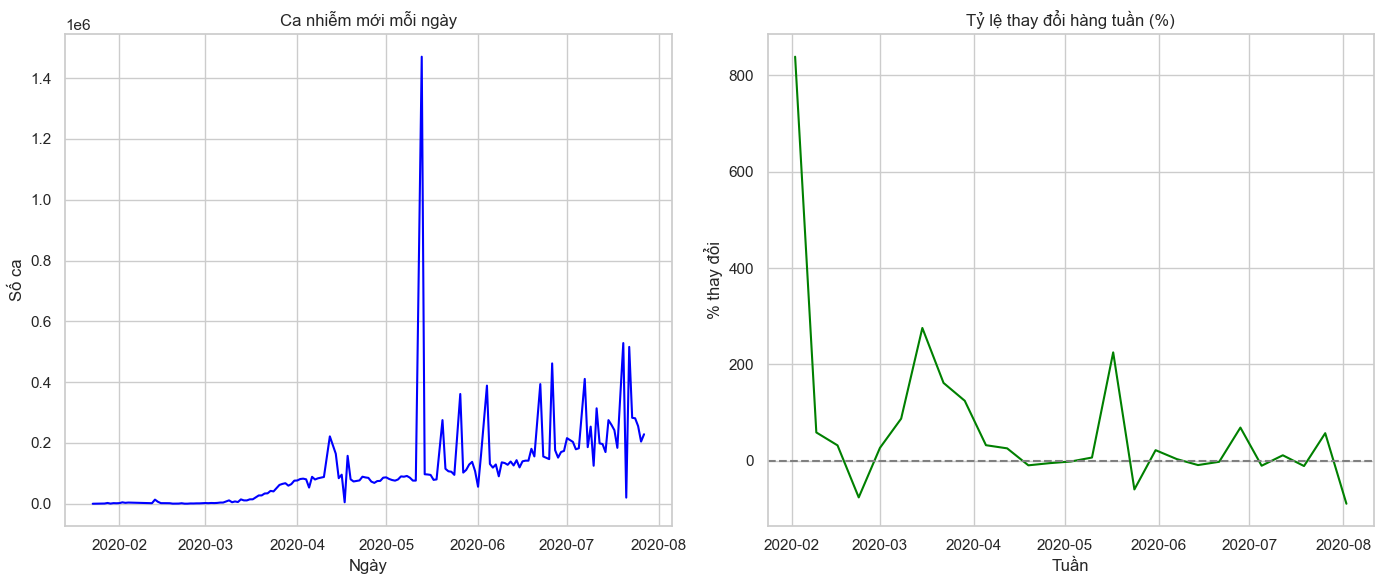

In [352]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn có DataFrame tên là df với các cột: 'date', 'country', 'confirmed'

# Bước 1: Chuyển đổi cột ngày và gộp tổng ca theo ngày
df['date'] = pd.to_datetime(df['date'])
daily_df = df.groupby('date')['confirmed'].sum().reset_index()
daily_df = daily_df.sort_values('date')

# Bước 2: Tính số ca mới mỗi ngày và phần trăm thay đổi
daily_df['daily_new'] = daily_df['confirmed'].diff()
daily_df['pct_change'] = daily_df['daily_new'].pct_change() * 100

# Loại bỏ giá trị âm (nếu có)
daily_df = daily_df[daily_df['daily_new'] >= 0]

# Bước 3: Tính trung bình theo tuần
weekly_df = daily_df.set_index('date').resample('W').sum().reset_index()
weekly_df['pct_change'] = weekly_df['daily_new'].pct_change() * 100

# ----------------- VẼ BIỂU ĐỒ -----------------
plt.figure(figsize=(14, 6))

# Subplot 1: Daily new cases
plt.subplot(1, 2, 1)
plt.plot(daily_df['date'], daily_df['daily_new'], label='Ca nhiễm mới mỗi ngày', color='blue')
plt.title('Ca nhiễm mới mỗi ngày')
plt.xlabel('Ngày')
plt.ylabel('Số ca')
plt.grid(True)
plt.tight_layout()

# Subplot 2: Weekly % change
plt.subplot(1, 2, 2)
plt.plot(weekly_df['date'], weekly_df['pct_change'], label='Thay đổi % hàng tuần', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Tỷ lệ thay đổi hàng tuần (%)')
plt.xlabel('Tuần')
plt.ylabel('% thay đổi')
plt.grid(True)
plt.tight_layout()

plt.show()


✅ Ý nghĩa của giá trị âm trong biểu đồ phần trăm thay đổi:

-   Giá trị âm cho thấy sự giảm trong số ca nhiễm so với kỳ trước.

-   Giá trị dương cho thấy sự tăng trong số ca nhiễm so với kỳ trước.

🧠 Ví dụ đơn giản:

| Ngày | Số ca mới | % thay đổi so với hôm trước |
| ---- | --------- | --------------------------- |
| 1/1  | 100       | —                           |
| 2/1  | 120       | +20%                        |
| 3/1  | 90        | -25%                        |

Ở đây, 90 là giảm so với 120 → biểu đồ % sẽ thể hiện giá trị âm, hoàn toàn chính xác.

### 6. Phân tích theo khu vực

In [353]:
df.head()

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,...,month,year,month_year,calculated_active,active_match,death_rate,recovery_rate,quarter,period,lockdown
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Trước lockdown,Trước giãn cách


In [354]:
# Tính tổng và tỷ lệ trung bình theo khu vực
# Nhóm theo khu vực WHO
region_summary = df.groupby("who_region").agg({
    "confirmed": "sum",
    "deaths": "sum",
    "recovered": "sum",
    "active": "sum"
})

# Tính tỷ lệ tử vong và hồi phục
region_summary["death_rate"] = region_summary["deaths"] / region_summary["confirmed"]
region_summary["recovery_rate"] = region_summary["recovered"] / region_summary["confirmed"]

# Làm đẹp dữ liệu: làm tròn
region_summary = region_summary.round(4)

# Hiển thị
region_summary.sort_values("confirmed", ascending=False)


,confirmed,deaths,recovered,active,death_rate,recovery_rate
who_region,,,,,,
Americas,400015685,19219682,156289944,224506059,0.0480,0.3907
Europe,246830467,19055771,122258200,105516496,0.0772,0.4953
Eastern Mediterranean,74080449,1923968,48050075,24106406,0.0260,0.6486
South-East Asia,55117856,1458130,30030301,23629425,0.0265,0.5448
Western Pacific,26240959,926499,18749246,6565214,0.0353,0.7145
Africa,21771106,439237,11183493,10148376,0.0202,0.5137


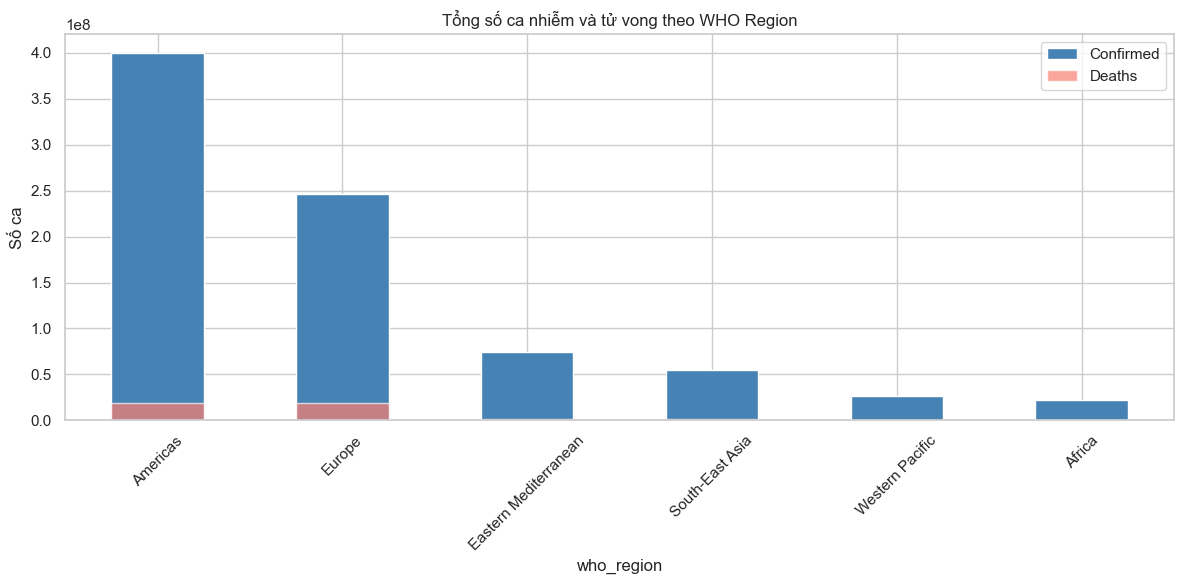

In [359]:
# Bar chart: Số ca nhiễm và tử vong theo khu vực

import matplotlib.pyplot as plt

region_summary_sorted = region_summary.sort_values("confirmed", ascending=False)

plt.figure(figsize=(12,6))
region_summary_sorted["confirmed"].plot(kind="bar", color="steelblue", label="Confirmed")
region_summary_sorted["deaths"].plot(kind="bar", color="salmon", alpha=0.7, label="Deaths")

plt.title("Tổng số ca nhiễm và tử vong theo WHO Region")
plt.ylabel("Số ca")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


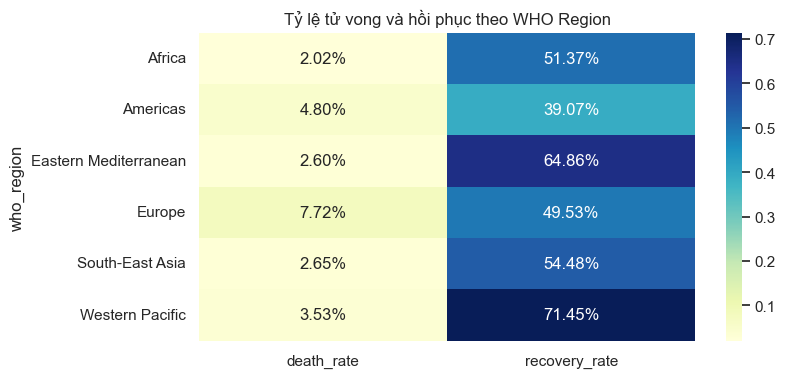

In [360]:
# Heatmap: Tỷ lệ tử vong và hồi phục theo khu vực

import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(region_summary[["death_rate", "recovery_rate"]], annot=True, cmap="YlGnBu", fmt=".2%")
plt.title("Tỷ lệ tử vong và hồi phục theo WHO Region")
plt.show()


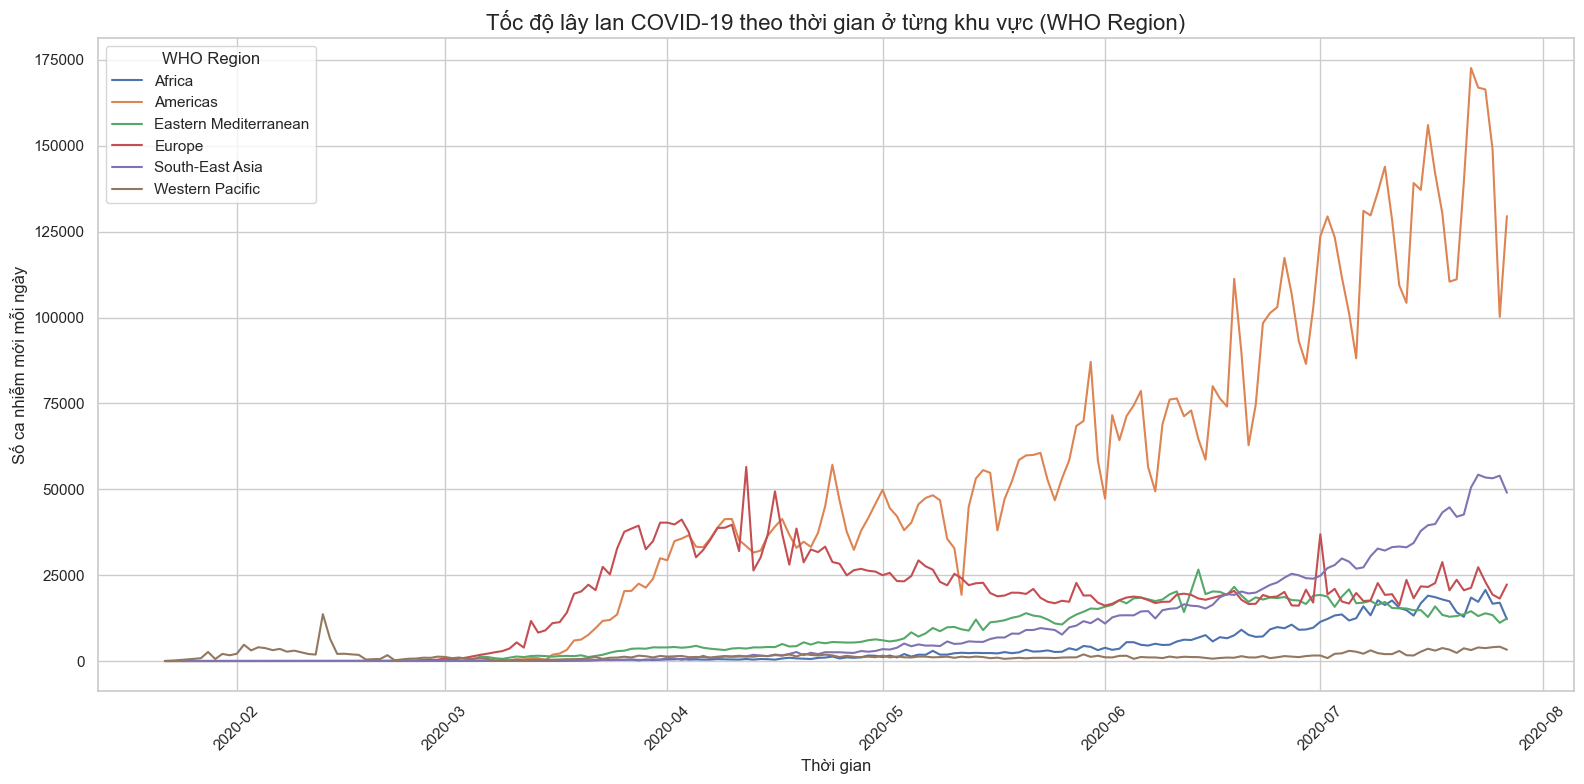

In [361]:
# Phân tích tốc độ lây lan theo thời gian ở mỗi khu vực

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo cột ngày có định dạng datetime
df['date'] = pd.to_datetime(df['date'])

# Loại bỏ các dòng thiếu dữ liệu new_cases hoặc who_region
df_filtered = df.dropna(subset=['new_cases', 'who_region'])

# Tổng số ca nhiễm mới theo ngày và khu vực
region_daily = df_filtered.groupby(['date', 'who_region'])['new_cases'].sum().reset_index()

# Thiết lập biểu đồ
plt.figure(figsize=(16, 8))
sns.lineplot(data=region_daily, x='date', y='new_cases', hue='who_region')

# Tùy chỉnh biểu đồ
plt.title('Tốc độ lây lan COVID-19 theo thời gian ở từng khu vực (WHO Region)', fontsize=16)
plt.xlabel('Thời gian')
plt.ylabel('Số ca nhiễm mới mỗi ngày')
plt.xticks(rotation=45)
plt.legend(title='WHO Region')
plt.tight_layout()

plt.show()


<Figure size 1400x600 with 0 Axes>

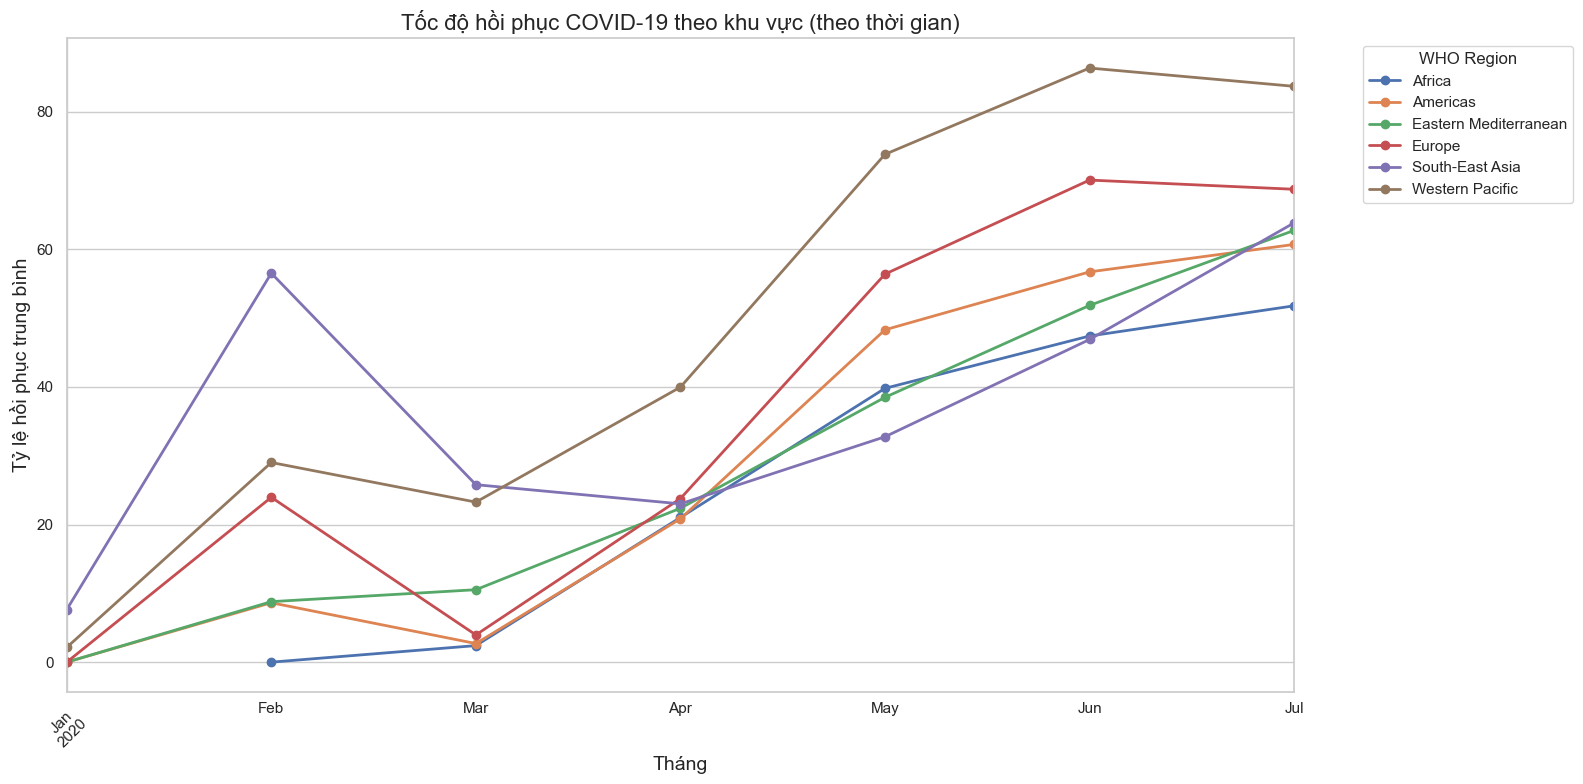

In [362]:
# Phân tích tốc độ hồi phục theo khu vực (who_region)
# Bước 1: Tính tốc độ hồi phục trung bình theo tháng và khu vực

# Tính tốc độ hồi phục trung bình theo tháng và khu vực
recovery_by_region = df.groupby(['month_year', 'who_region'])['recovery_rate'].mean().reset_index()

# Pivot để dễ vẽ biểu đồ
recovery_pivot = recovery_by_region.pivot(index='month_year', columns='who_region', values='recovery_rate')

# Bước 2: Vẽ biểu đồ xu hướng tốc độ hồi phục
plt.figure(figsize=(14, 6))
recovery_pivot.plot(marker='o', figsize=(16, 8), linewidth=2)
plt.title('Tốc độ hồi phục COVID-19 theo khu vực (theo thời gian)', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tỷ lệ hồi phục trung bình', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


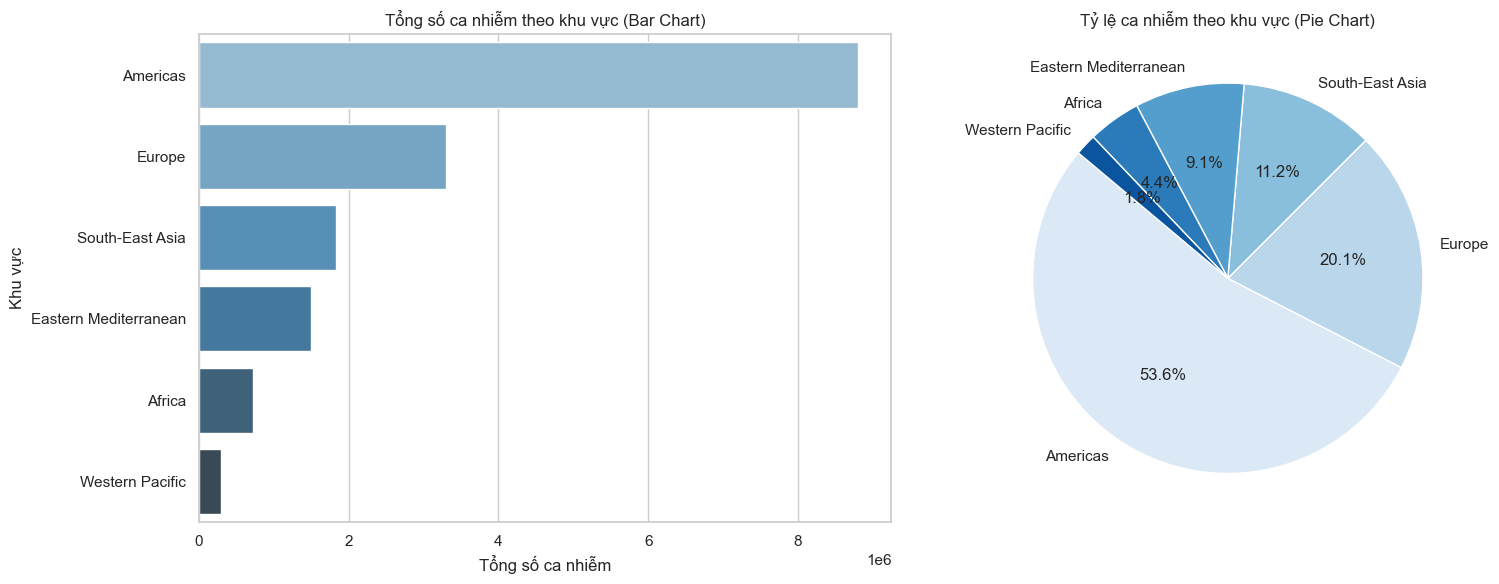

In [363]:
# Tổng ca nhiễm từng khu vực

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử df là DataFrame gốc và đã có cột 'who_region' và 'new_cases'
region_cases = df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False).reset_index()

# Tạo biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Bar: dùng hue để tránh cảnh báo
sns.barplot(
    data=region_cases,
    x='new_cases',
    y='who_region',
    hue='who_region',
    dodge=False,
    palette='Blues_d',
    ax=axes[0],
    legend=False  # Tắt legend nếu không cần
)
axes[0].set_title('Tổng số ca nhiễm theo khu vực (Bar Chart)')
axes[0].set_xlabel('Tổng số ca nhiễm')
axes[0].set_ylabel('Khu vực')

# Biểu đồ Pie
axes[1].pie(
    region_cases['new_cases'],
    labels=region_cases['who_region'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(region_cases))
)
axes[1].set_title('Tỷ lệ ca nhiễm theo khu vực (Pie Chart)')

plt.tight_layout()
plt.show()


## Conclusion